<h1 align="center">Business Problem</h1>

<p>The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.</p>


# Dataset details

<b>Product Purchased:</b>	KP281, KP481, or KP781<br>
<b>Age:</b>	In years<br>
<b>Gender:</b>	Male/Female<br>
<b>Education:</b>	In years<br>
<b>MaritalStatus:</b>	Single or partnered<br>
<b>Usage:</b>	The average number of times the customer plans to use the treadmill each week.<br>
<b>Income:</b>	Annual income (in $)<br>
<b>Fitness:</b>	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.<br>
<b>Miles:</b>	The average number of miles the customer expects to walk/run each week<br>

## Table of contents
1. Analysing basic metrics
2. Non-Graphical Analysis.
3. Univariate Analysis.
4. Bivariate Analysis.
5. Multivariate Analysis.
6. Probability Analysis.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.dpi":150})
sns.set_style("whitegrid")

In [2]:
# Loading data
data = pd.read_csv(r'data\aerofit_treadmill.csv')

## 1. Analysing basic metrics

In [3]:
# checking shape of data
data.shape

(180, 9)

In [4]:
# checking datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
# Converting type to category
data = data.astype({'Product':'category', 'Gender':'category', 'MaritalStatus':'category' })

<div class="alert alert-block alert-info">
<h3>Observations:</h3> 
    1. 180 rows and 9 columns are there.<br>
    2. There are 3 object columns `Product`, `Gender`, `MaritalStatus` that seems category type.<br>
    3. High value of standard devidation for column miles that is 51.86 whereas mean is 103.19.<br>
    4. No missing values in data.
</div>




<div color='white'>
    <br>
    <hr>
    <br>
</div>
    

## 2. Non Graphical Analysis

In [7]:
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
for i in ['Product', 'Gender', 'MaritalStatus', 'Education']:
    display(data[i].value_counts())
    print('-'*50)

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

--------------------------------------------------


Male      104
Female     76
Name: Gender, dtype: int64

--------------------------------------------------


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

--------------------------------------------------


16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

--------------------------------------------------


In [9]:
pd.cut(data.Income, bins=[25000, 45000, 65000, 85000, 105000 ]).value_counts()

(45000, 65000]     103
(25000, 45000]      49
(85000, 105000]     17
(65000, 85000]      11
Name: Income, dtype: int64

In [10]:
pd.cut(data.Miles, bins=[0,50,100,150,200,250,300,350,400]).value_counts()

(50, 100]     97
(100, 150]    38
(150, 200]    22
(0, 50]       17
(250, 300]     3
(200, 250]     2
(350, 400]     1
(300, 350]     0
Name: Miles, dtype: int64

In [11]:
pd.cut(data.Age, bins=[15,20,25,30,35,40,45,50]).value_counts()

(20, 25]    69
(25, 30]    41
(30, 35]    32
(35, 40]    16
(15, 20]    10
(40, 45]     6
(45, 50]     6
Name: Age, dtype: int64

<div class="alert alert-block alert-info">
<h3>Observations:</h3> 
    1. Columns <i>Education</i>, <i>Usage</i>, <i>Fitness</i> are having less unique values.<br>
    2. Most selling product is KP281.<br>
    3. Male buys more than Females.<br>
    4. More Partnered people than Single.<br>
    5. 16 years is the most common Education years.<br>
    6. Most people have Income between 45000\$ to 65000\$.<br>
    7. Common number of Miles is in range 50-150.<br>
    8. People of Age between 20-30 years are representing more than half of the group.
</div>




<div color='white'>
    <br>
    <hr>
    <br>
</div>
    

## 3. Univariate Analysis

### 3.1 Category columns

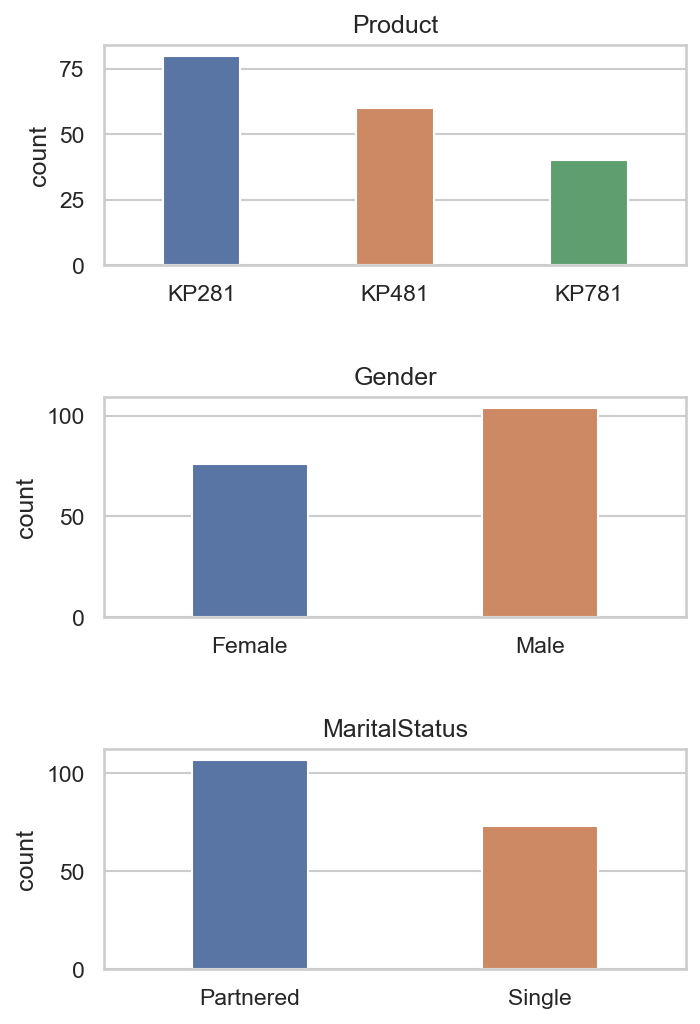

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 8))
plt.subplots_adjust(hspace=0.6)

for i, ax in zip(data.select_dtypes(['category']), axs.ravel()):
    sns.countplot(x=data[i],width=0.4, ax=ax)
    ax.set_title(i)
    ax.set_xlabel('')
    

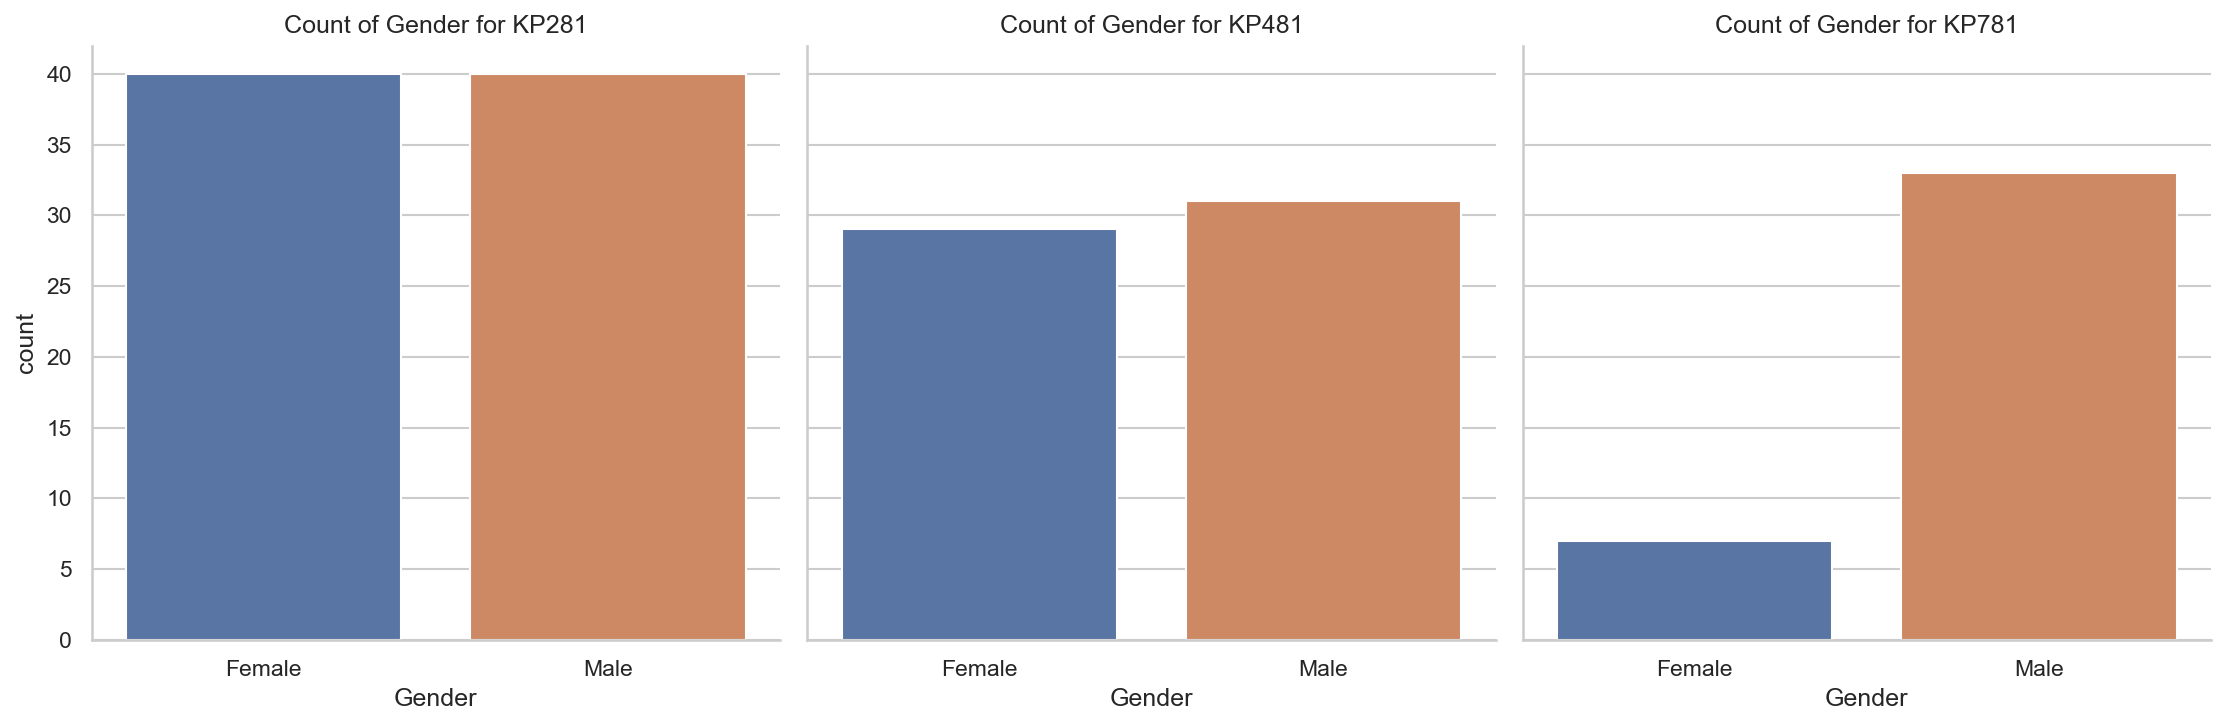

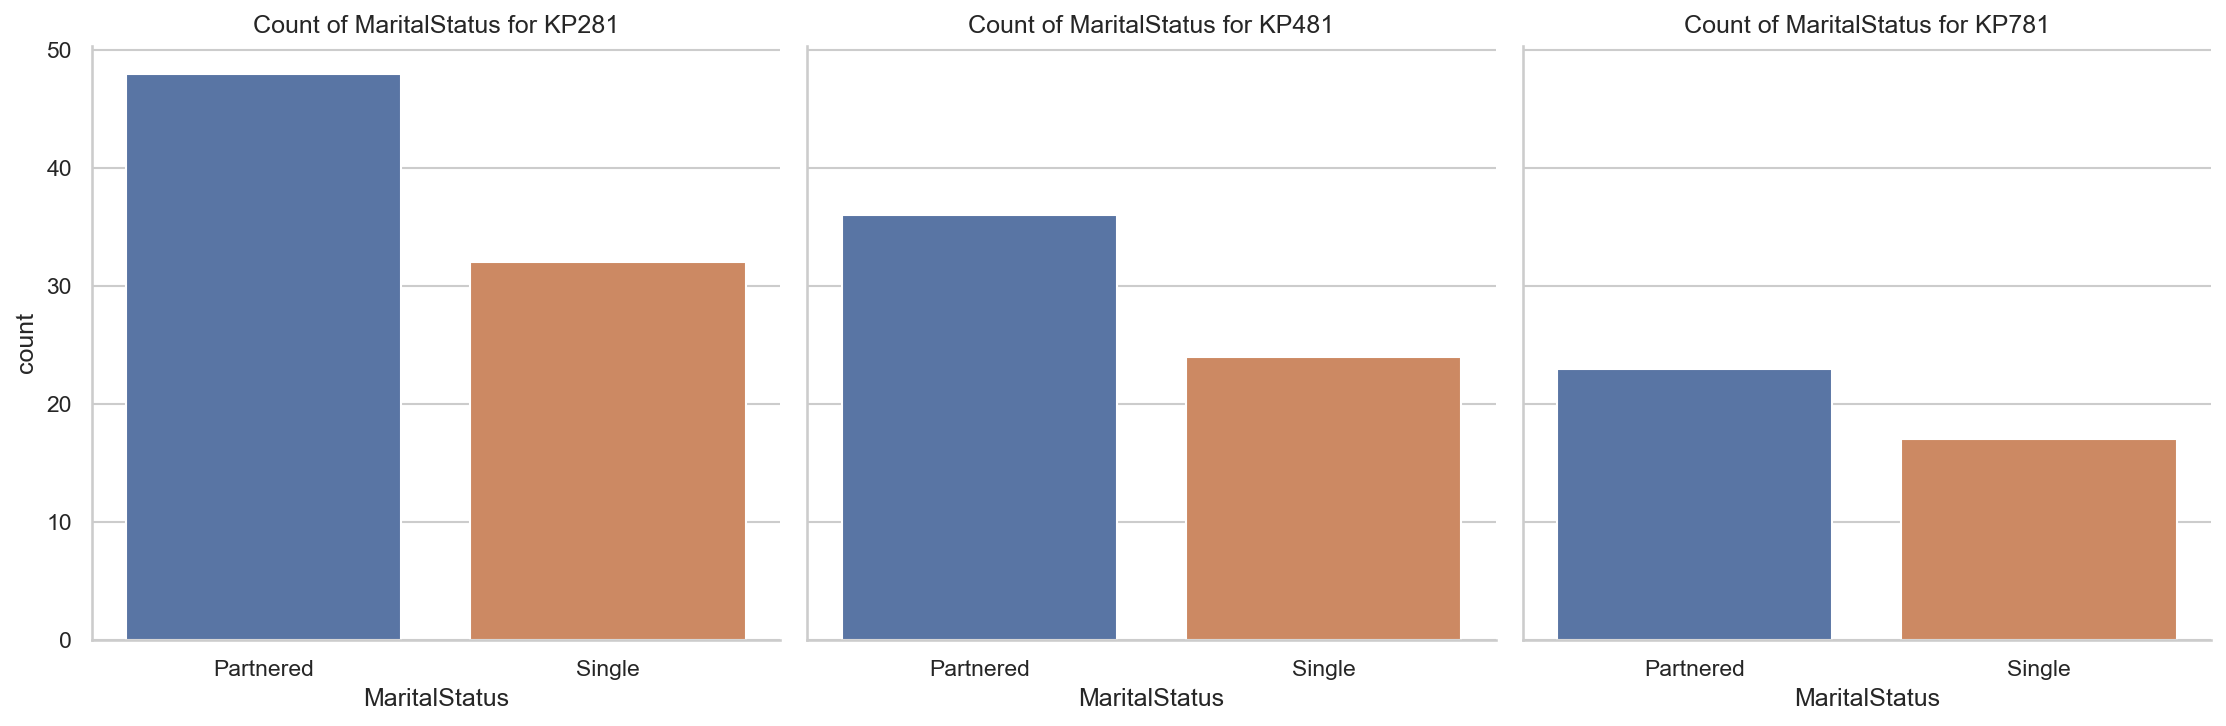

In [13]:
for i in ['Gender', 'MaritalStatus']:
    ax = sns.catplot(data=data, col='Product', x=i, kind='count')
    ax.set_titles('Count of '+i+' for {col_name}')

<div class="alert alert-block alert-info">
<h3>Observations:</h3> 
    1. Maximum people buys KP281 and less people buys KP781.<br>
    2. More male customer than female.<br>
    3. Partnered people are most buyers than Single for all products.<br>
</div>



### 3.2 Numerical columns

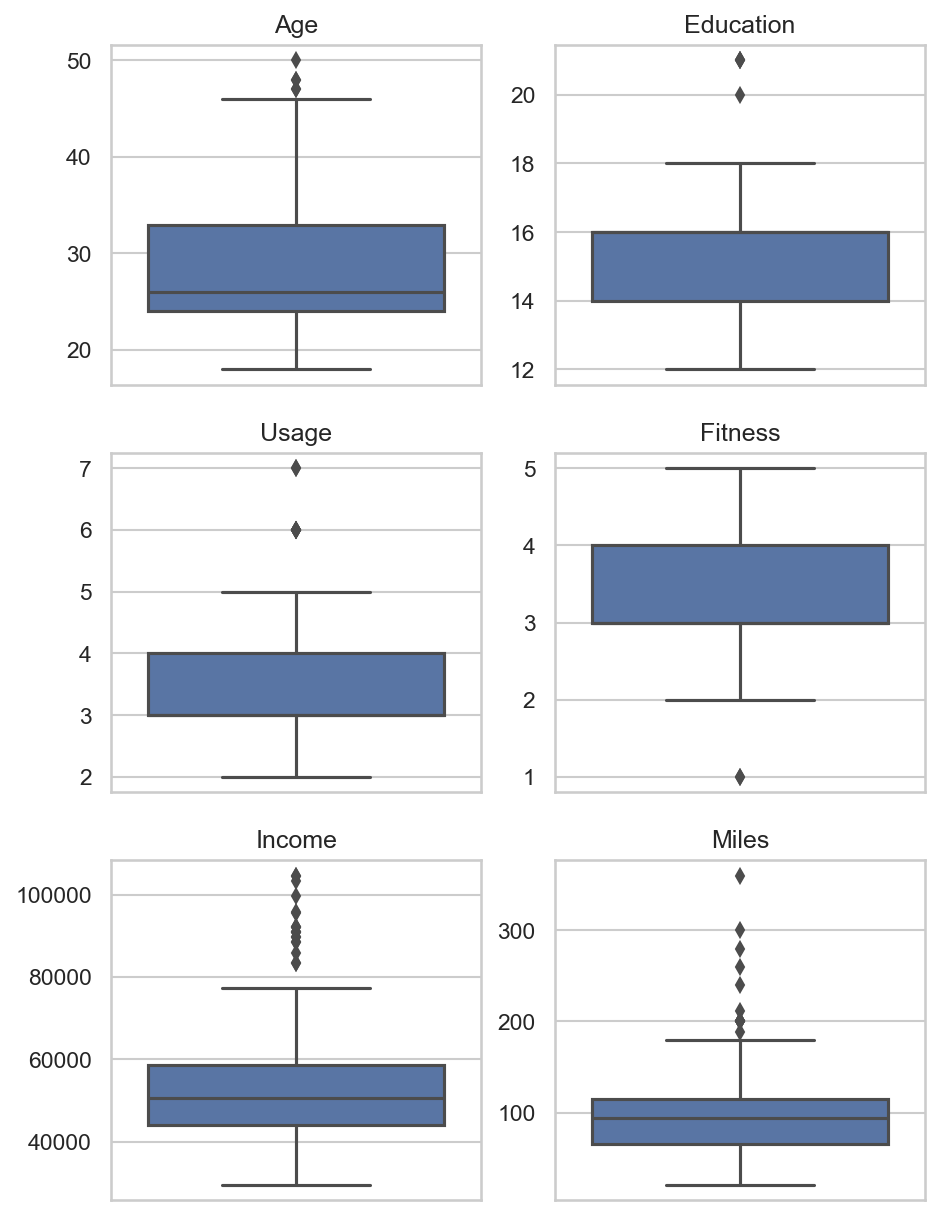

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 10))
plt.subplots_adjust(hspace=0.2)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.boxplot(data[i], ax=ax)
    ax.set_title(i)
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off)


<div class="alert alert-block alert-info">
<h3>Observations:</h3> <br>
    1. Most customer's age is in range 22-35 years. Few buyers have age more than 45 years.<br>
    2. Education ranges mostly in 14-16 years. Very few people have education more than 18 years.<br>
    3. Only two people have Usage vlaue more than 5.<br>
    4. Generally people giving Fitness value between 3 and 4.<br>
    5. There are lot of outliers for columns `Income` and `Miles`.<br>
    6. More Male Buyers for KP781 than Females.<br>
    7. For all products Partnered people are the most buyers.<br>
<br>
As the dataset is small so we are not treating the outliers but we will treat them later if needed.
</div>


<div color='white'>
    <br>
    <hr>
    <br>
</div>
    

## 4. Bivariate Analysis

#### 4.1 Numerical columns vs. Product

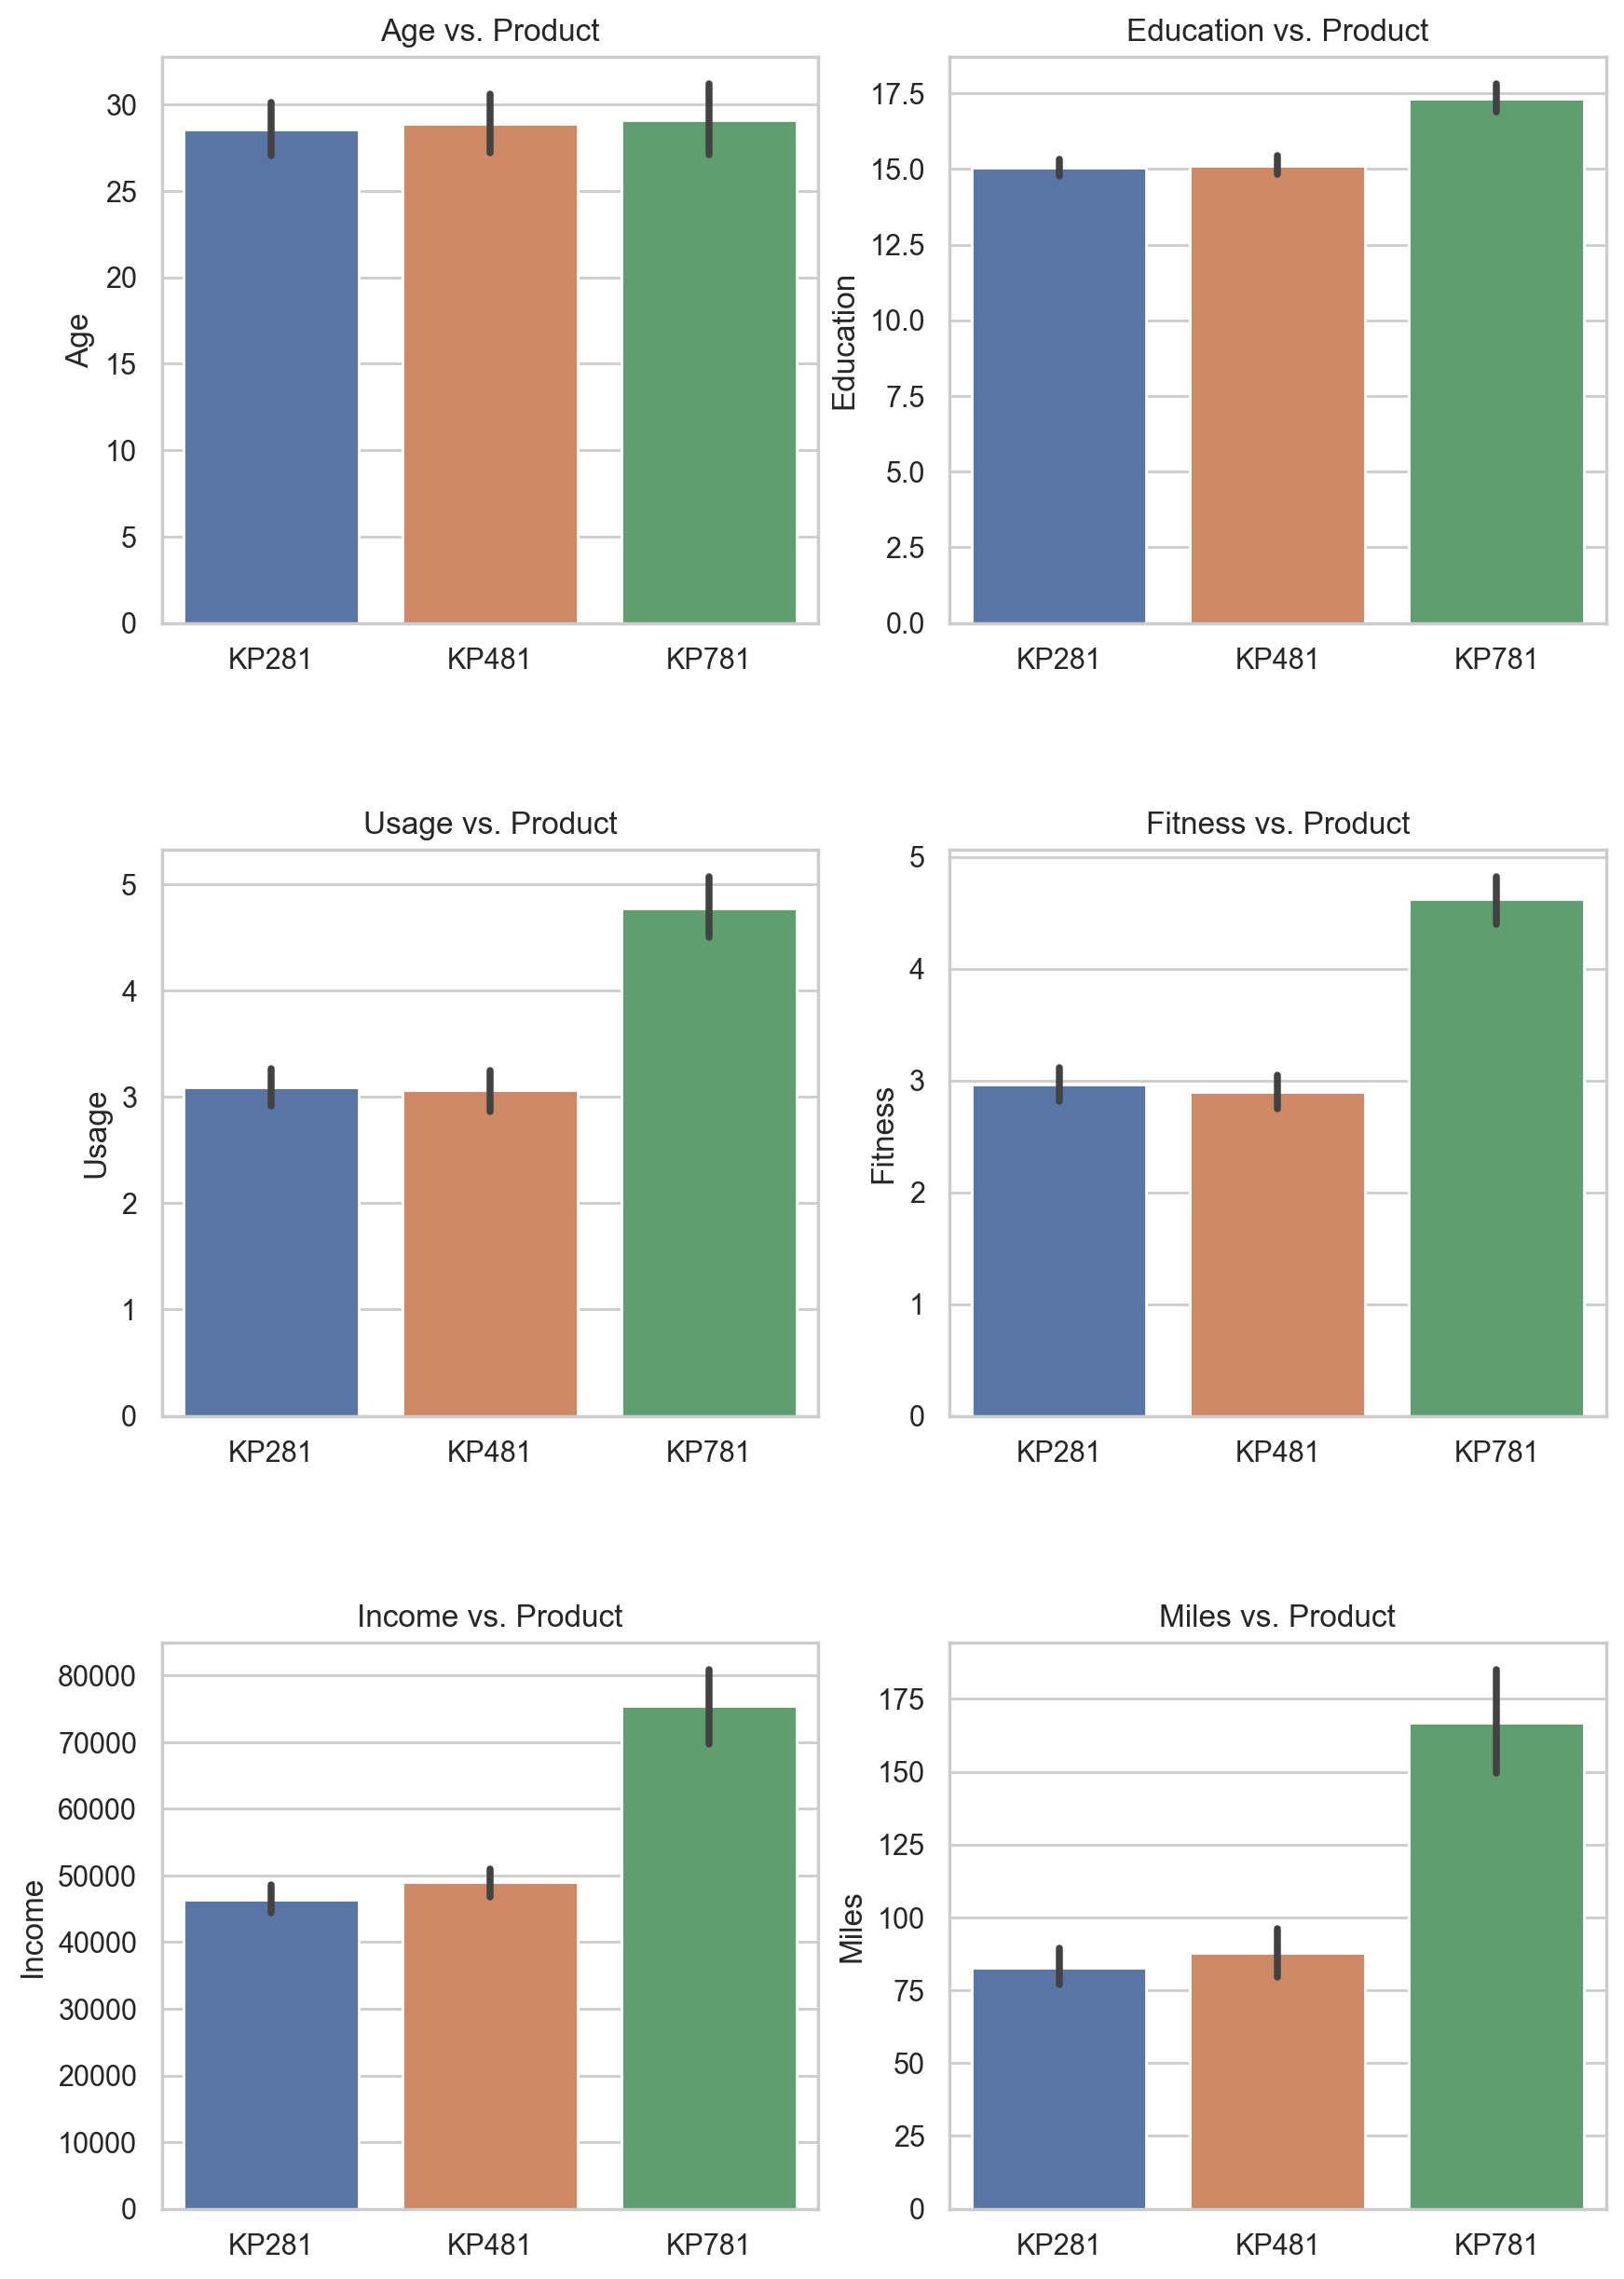

In [15]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), dpi=200)
plt.subplots_adjust(hspace=0.4)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.barplot(data=data, x='Product', y=i, ax=ax)
    ax.set_title(i+' vs. Product')
    ax.set_xlabel('')

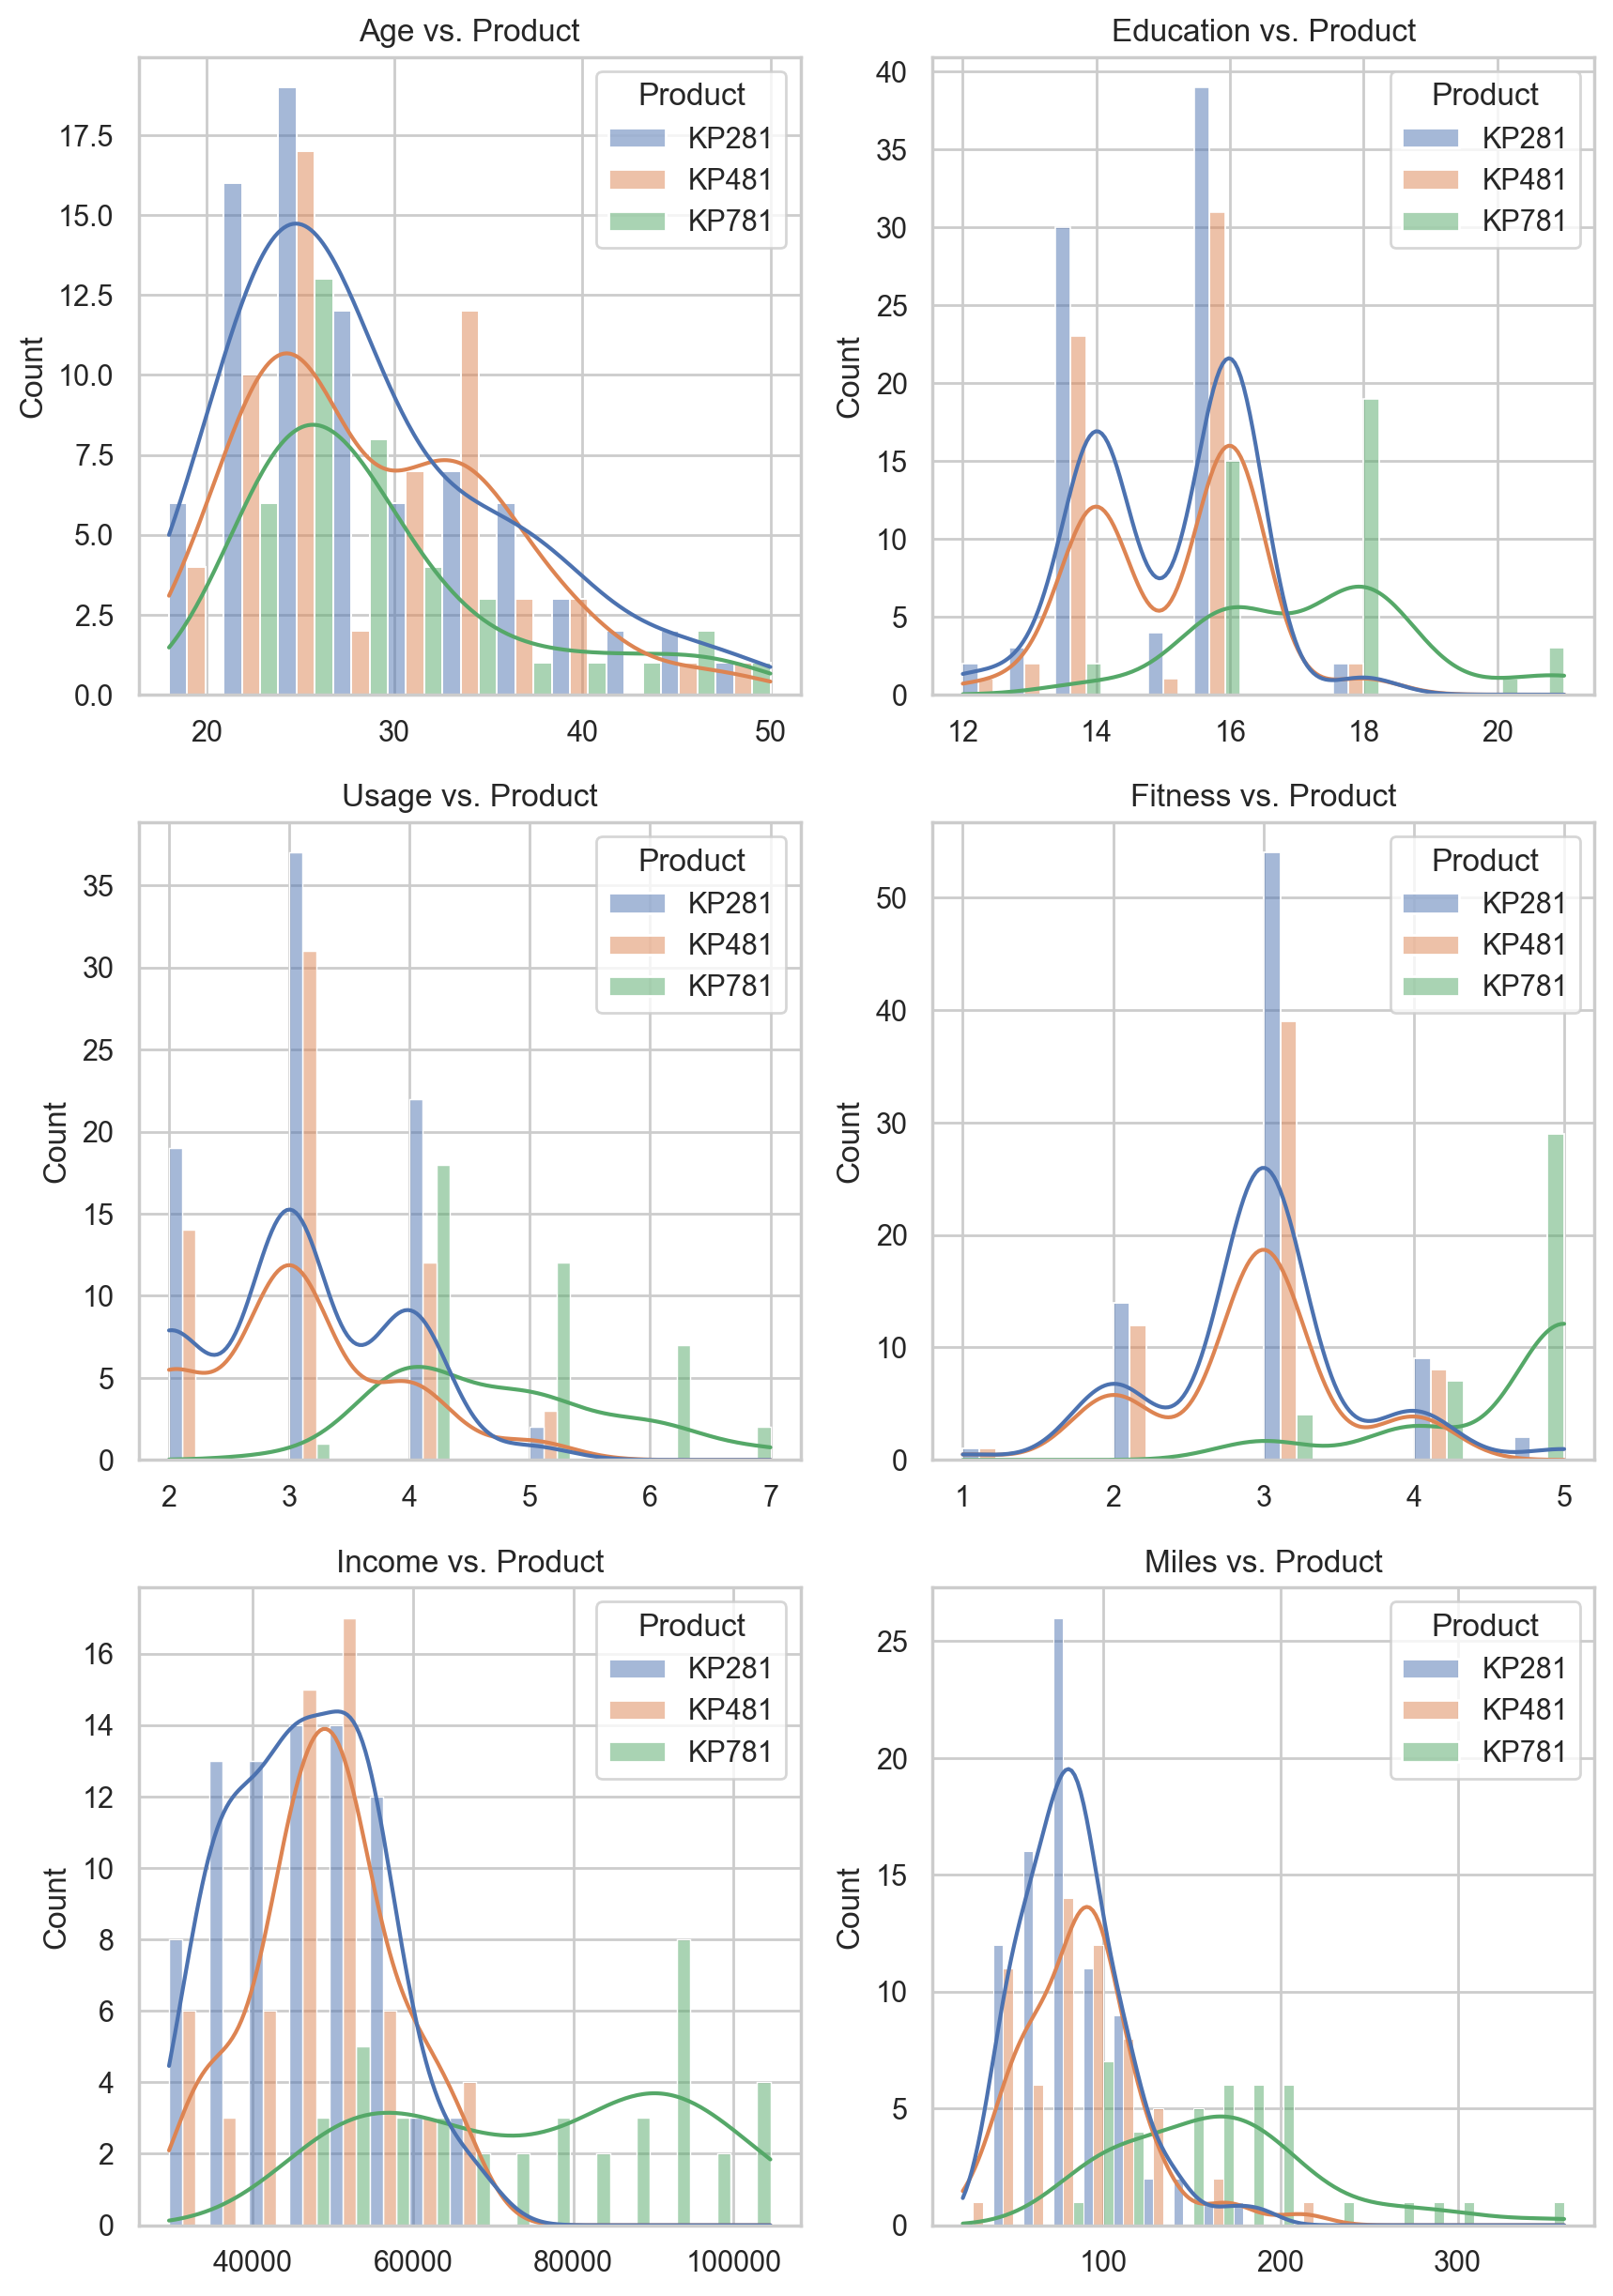

In [16]:
# Taking closer look 

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), dpi=200)
plt.subplots_adjust(hspace=0.2)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.histplot(data=data, x=i, hue="Product", ax=ax, multiple='dodge', kde=True)
    ax.set_title(i+' vs. Product')
    ax.set_xlabel('')

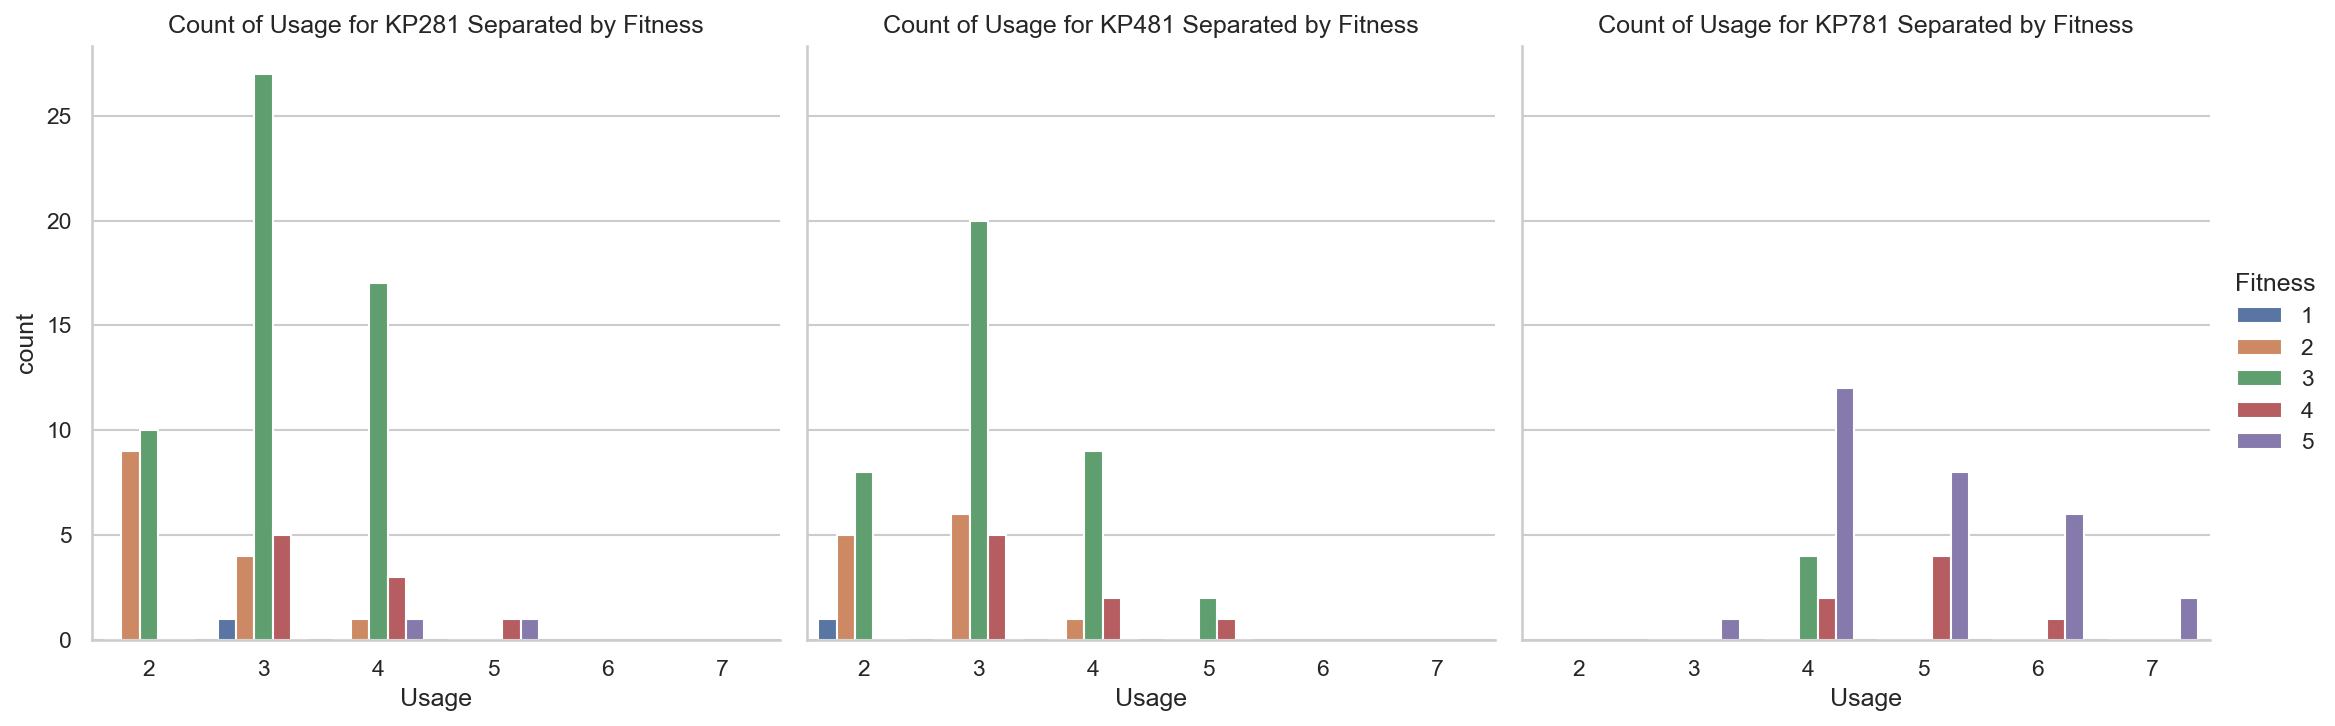

In [17]:
ax = sns.catplot(data=data, x='Usage',col="Product", hue='Fitness', kind="count")
ax.set_titles('Count of Usage for {col_name} Separated by Fitness')

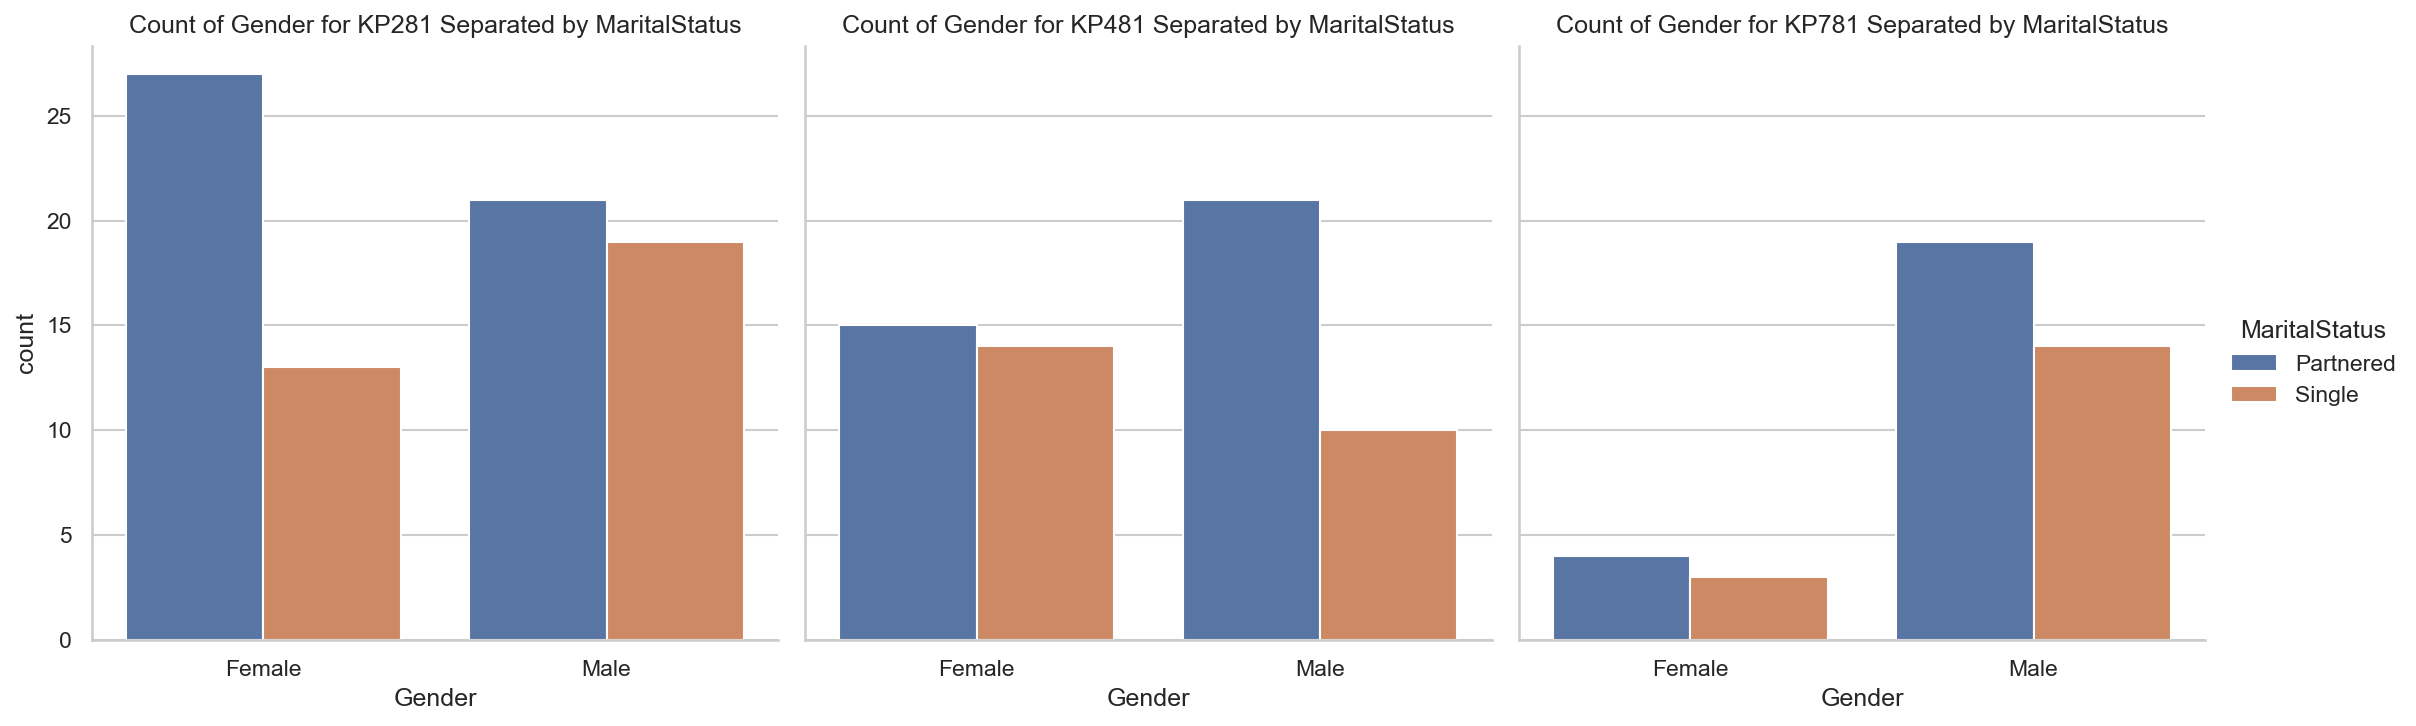

In [18]:
ax = sns.catplot(data=data, x='Gender',col="Product", hue='MaritalStatus', kind="count")
ax.set_titles('Count of Gender for {col_name} Separated by MaritalStatus')

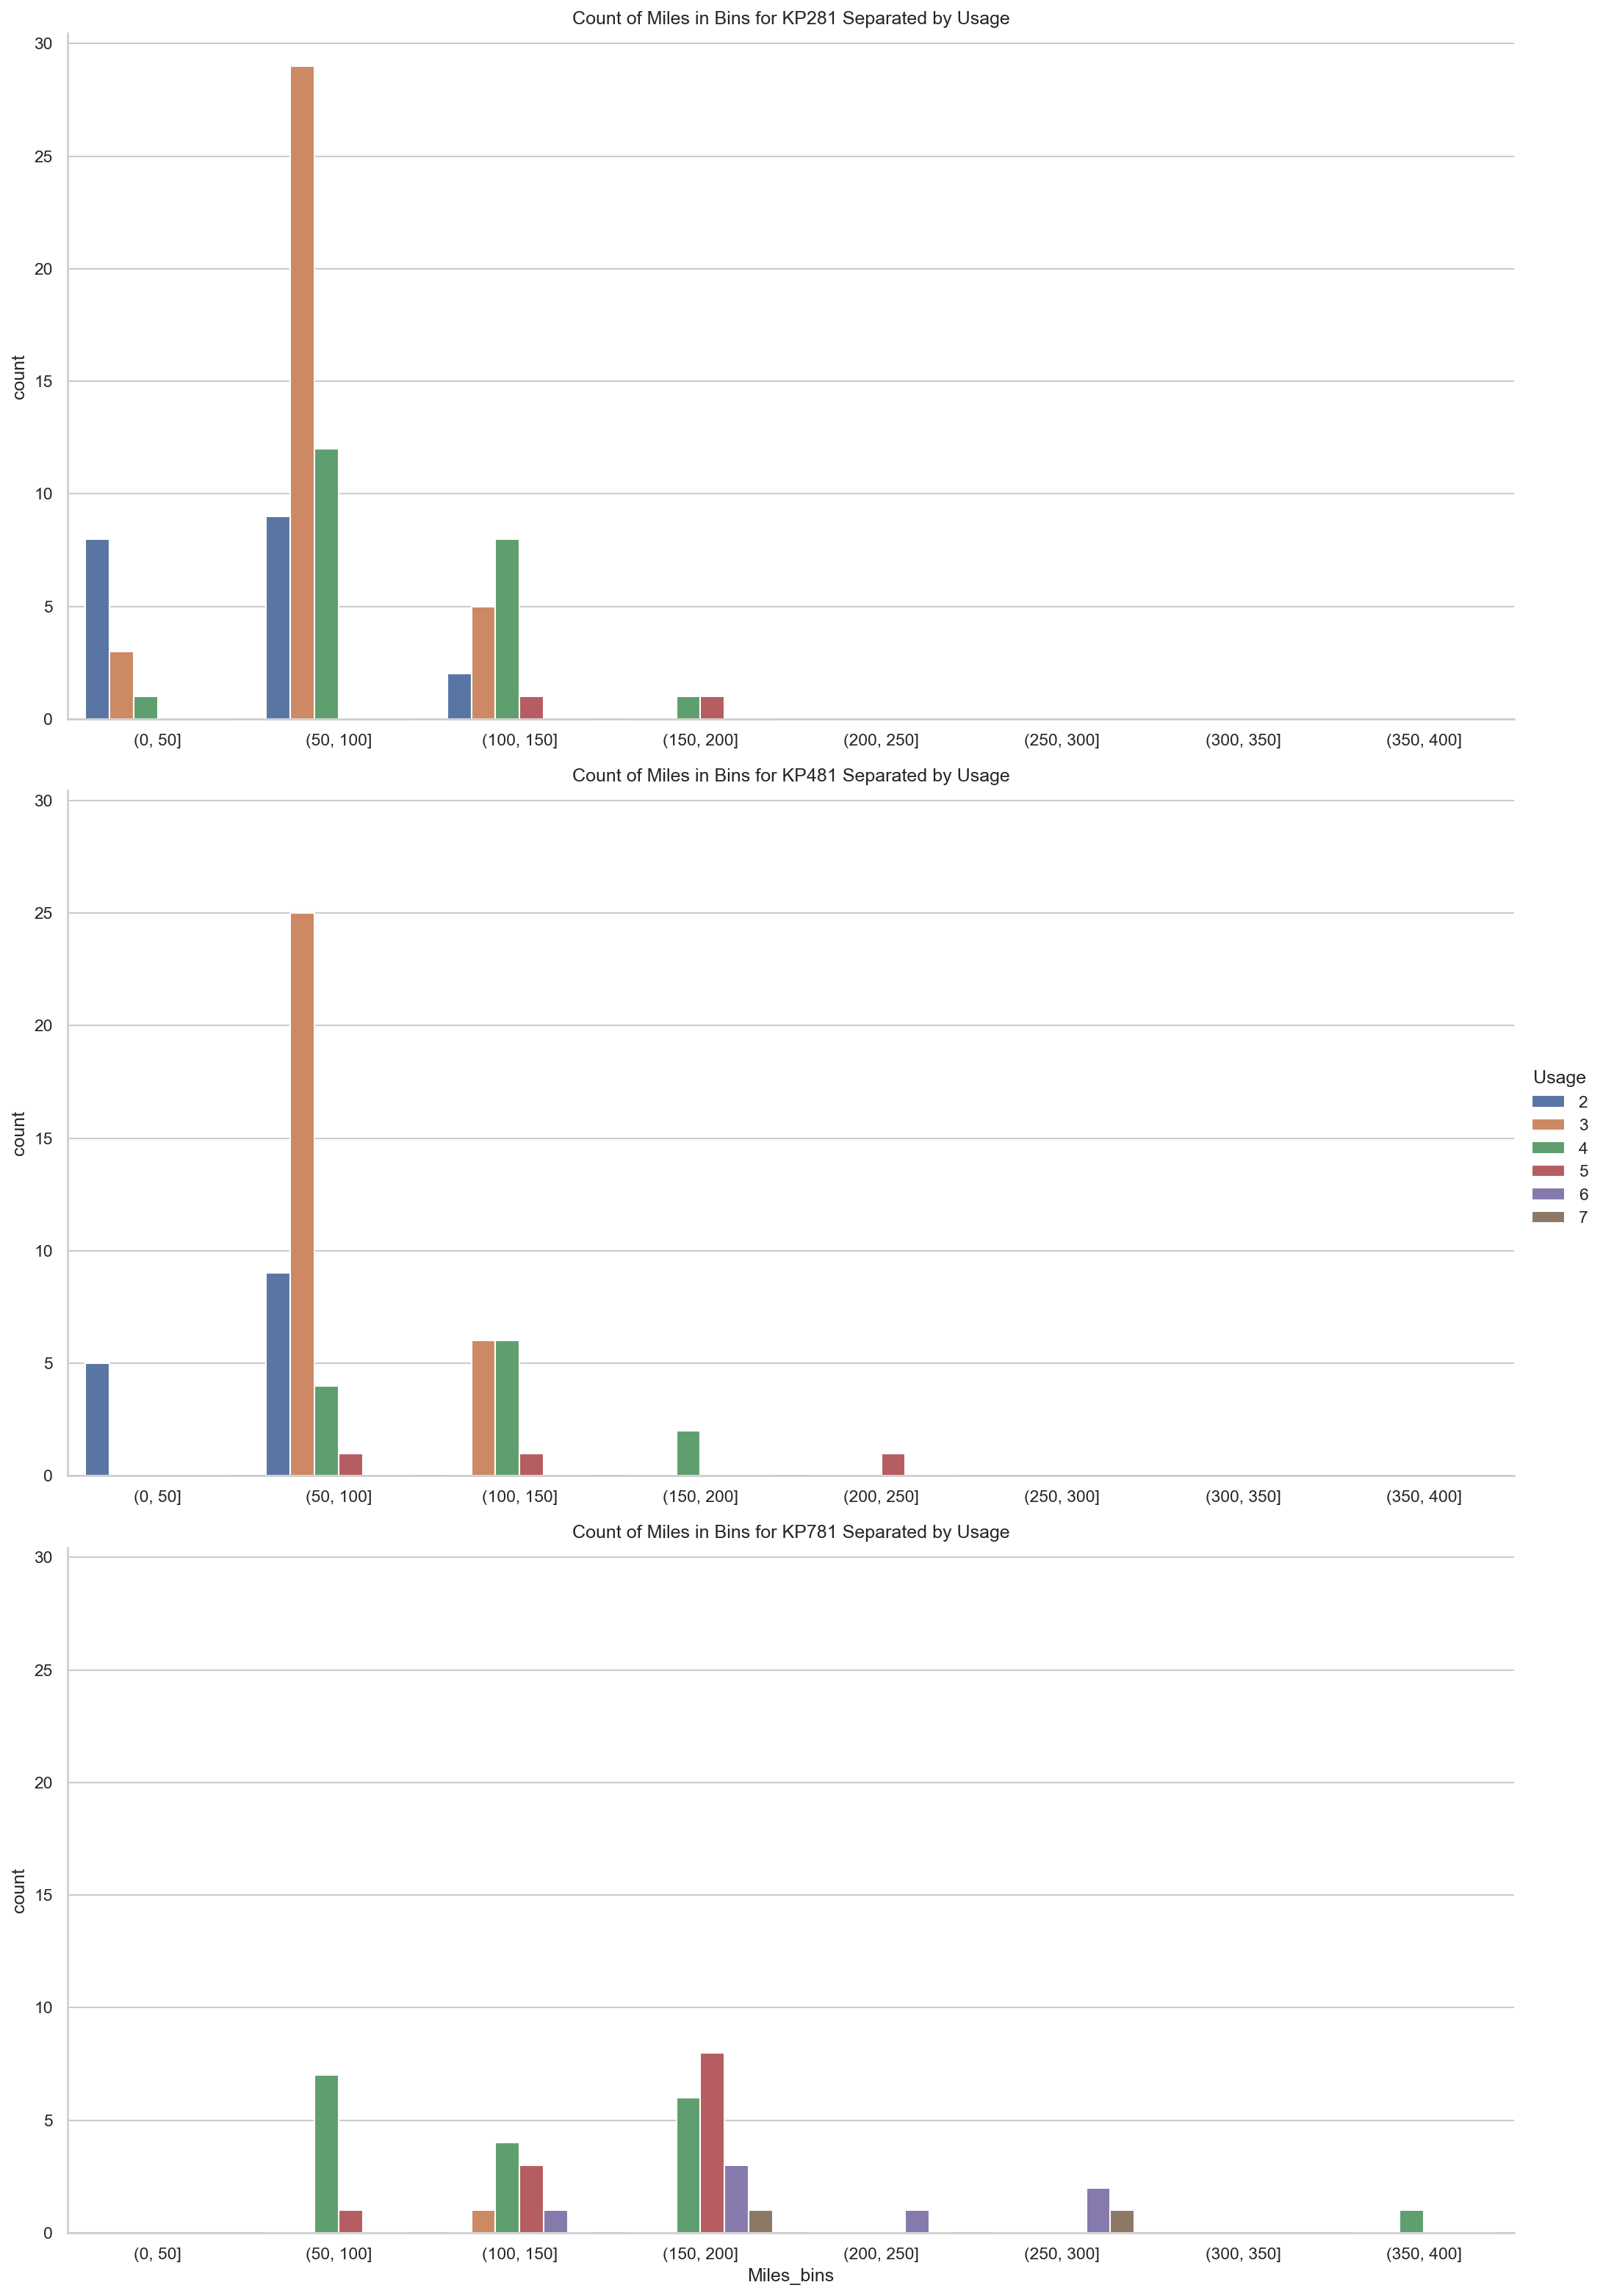

In [19]:
df = data.copy()
df['Miles_bins'] = pd.cut(data.Miles, bins=range(0,450,50))
ax = sns.catplot(data=df, x='Miles_bins',col="Product", hue='Usage', 
                 kind="count", aspect=2,height=7, col_wrap=1, sharex=False)
ax.set_titles('Count of Miles in Bins for {col_name} Separated by Usage')

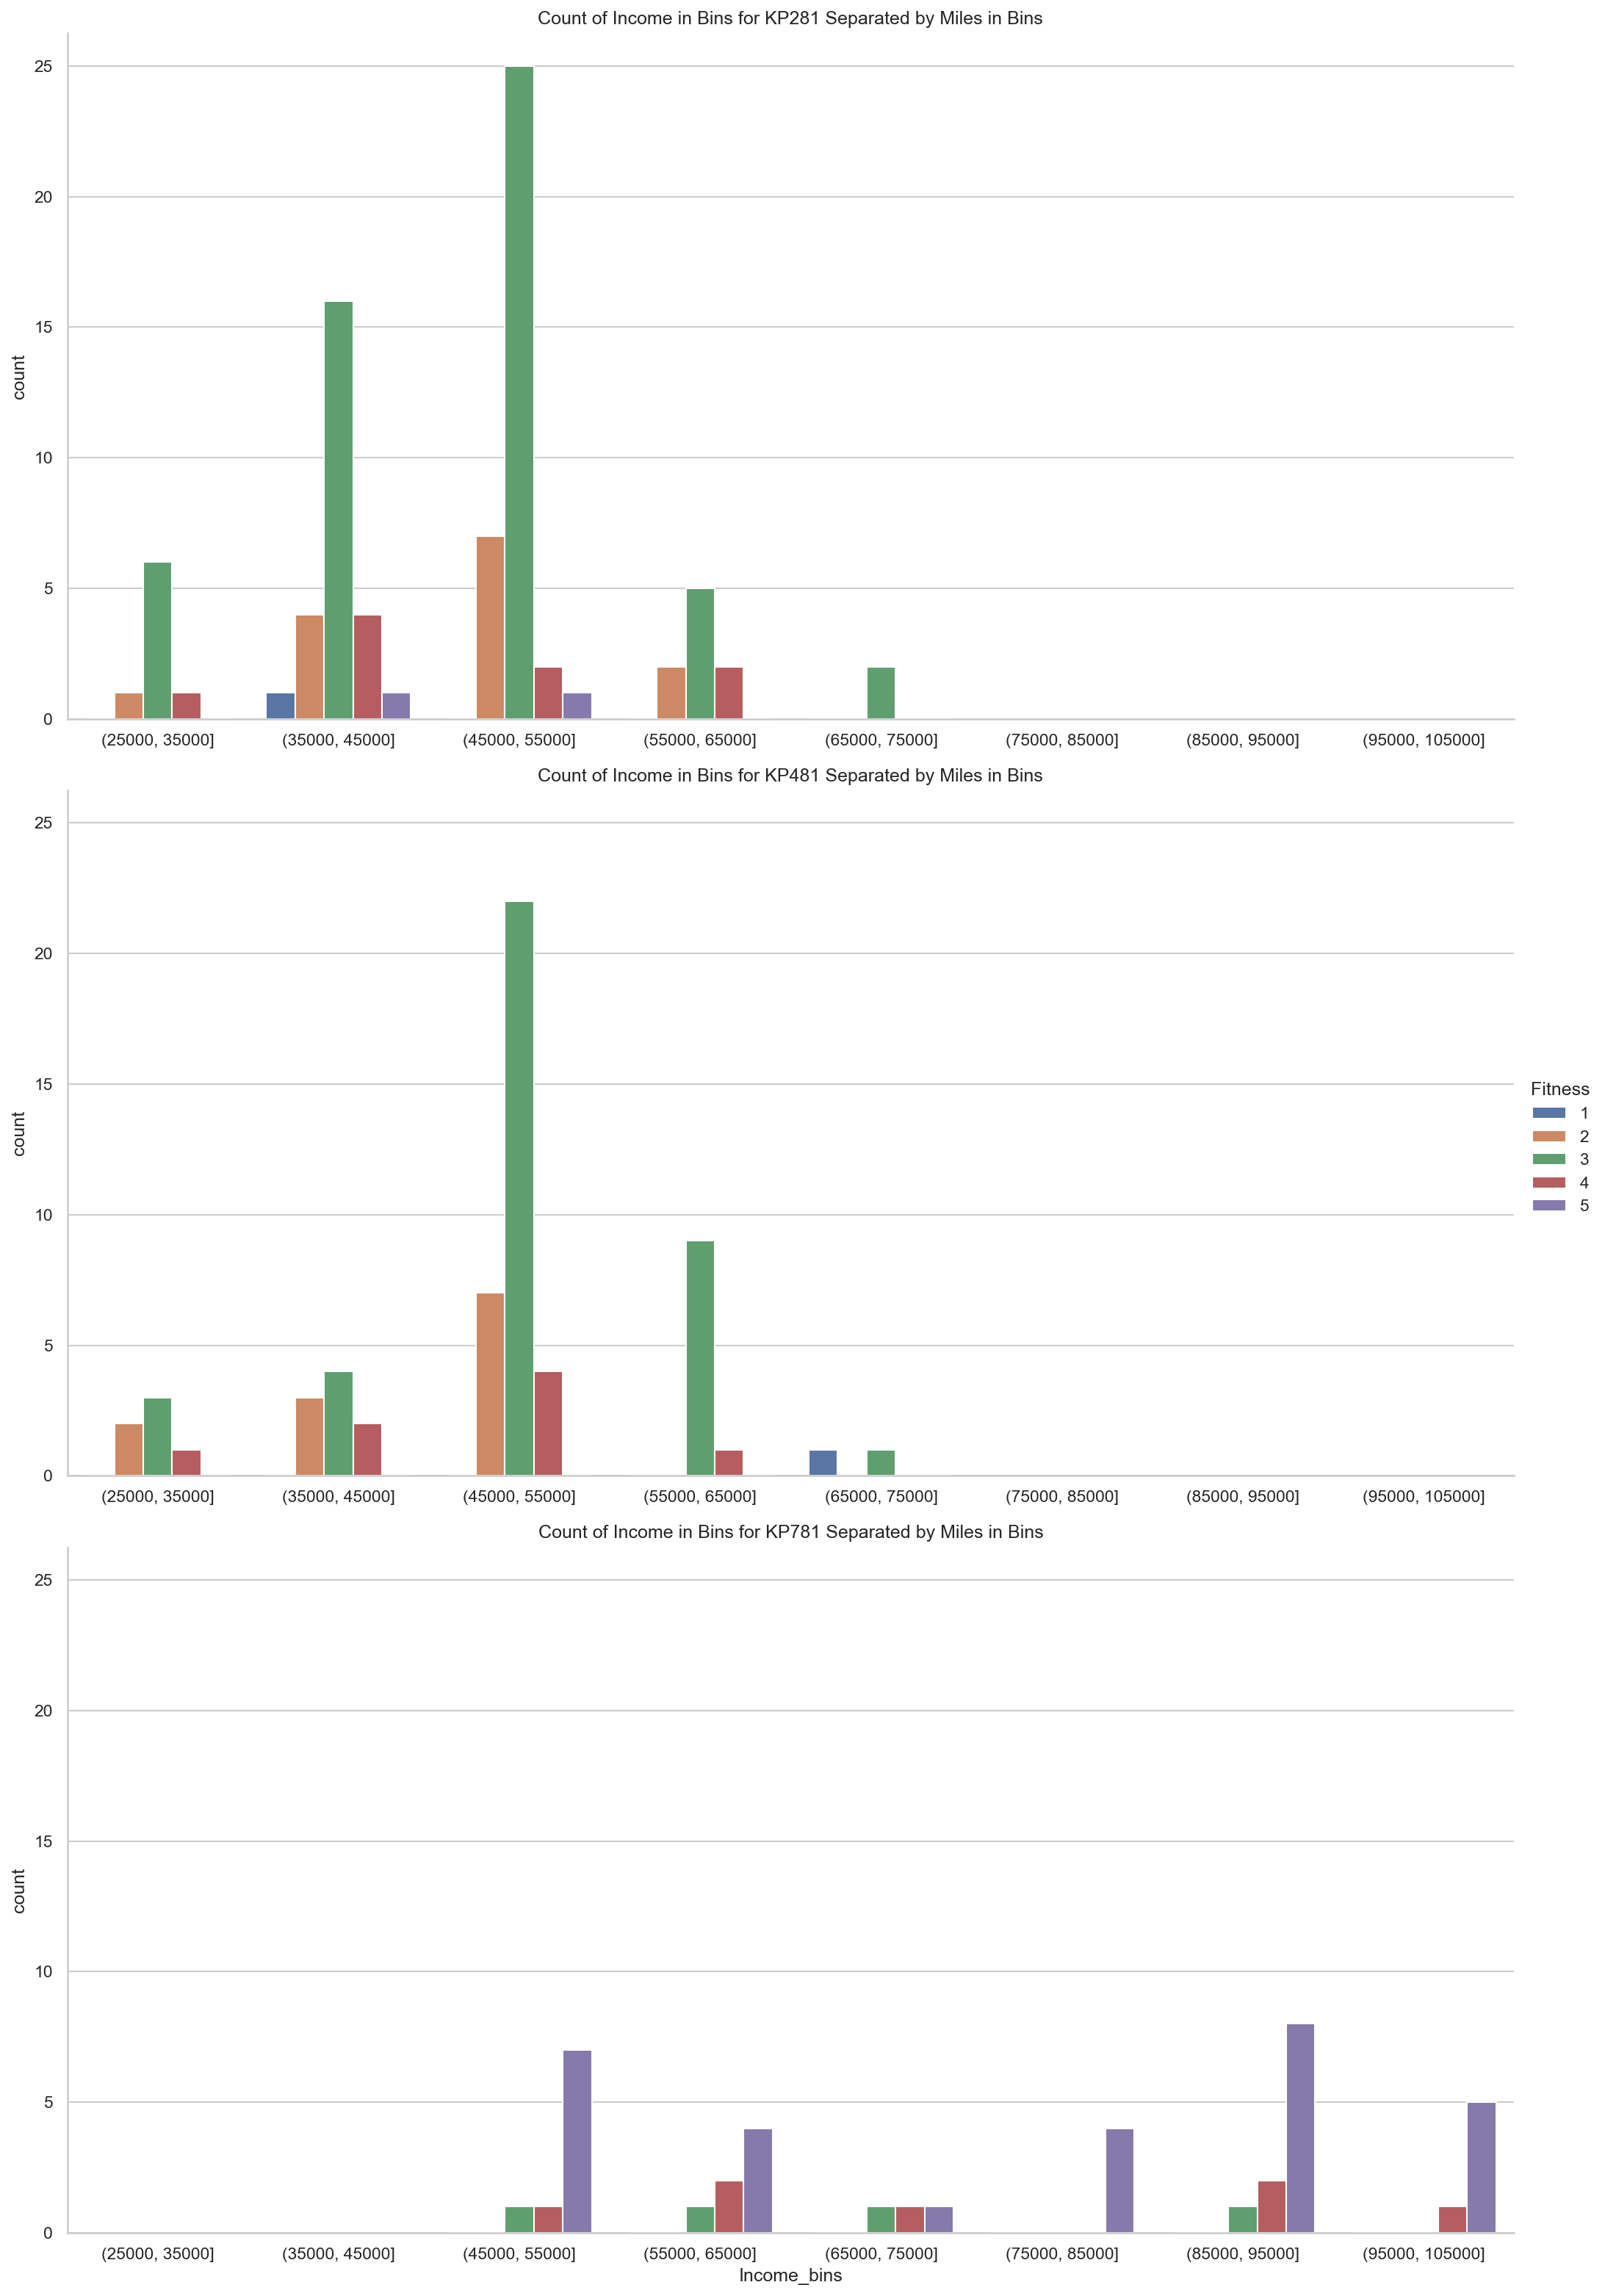

In [20]:
df = data.copy()
df['Miles_bins'] = pd.cut(data.Miles, bins=range(0,450,50))
df['Income_bins'] = pd.cut(data.Income, bins=range(25000, 115000, 10000))
ax = sns.catplot(data=df, x='Income_bins',col="Product", hue='Fitness', 
                 kind="count", aspect=2,height=7, col_wrap=1, sharex=False)
ax.set_titles('Count of Income in Bins for {col_name} Separated by Miles in Bins')

<div class="alert alert-block alert-info">
<h3>Observations:</h3> <br>
    1. No significant difference in Ages for different products and it seems to be right skewed.<br>
    2. No significant difference in Buyers for KP281 and KP481 for all feature.<br>
    3. Most buyers of KP781 have education years more than 16, Usage greater than 4, Fitness ratings 5, Income more than 60000, Miles more than 150.<br>
    4. Partnered Female most likely to buy KP281 than partnered Male.<br>
    5. Partnered Male most likely to buy KP481 than Single Male. <br>
    6. Very few Female buyed KP781 than Man.
    7. Usage value 3 and Miles range 50-100 are most likely to buy KP281 or KP481.<br>
    8. Income greater than 45000 and Fitness value 5 buyed mostly KP781.<br>
    9. Fitness value 3 and Income between 55000\$ and 65000\$ buyed mostly KP481.<br>
</div>

<div color='white'>
    <br>
    <hr>
    <br>
</div>
    

## 5. Multivariate Analysis

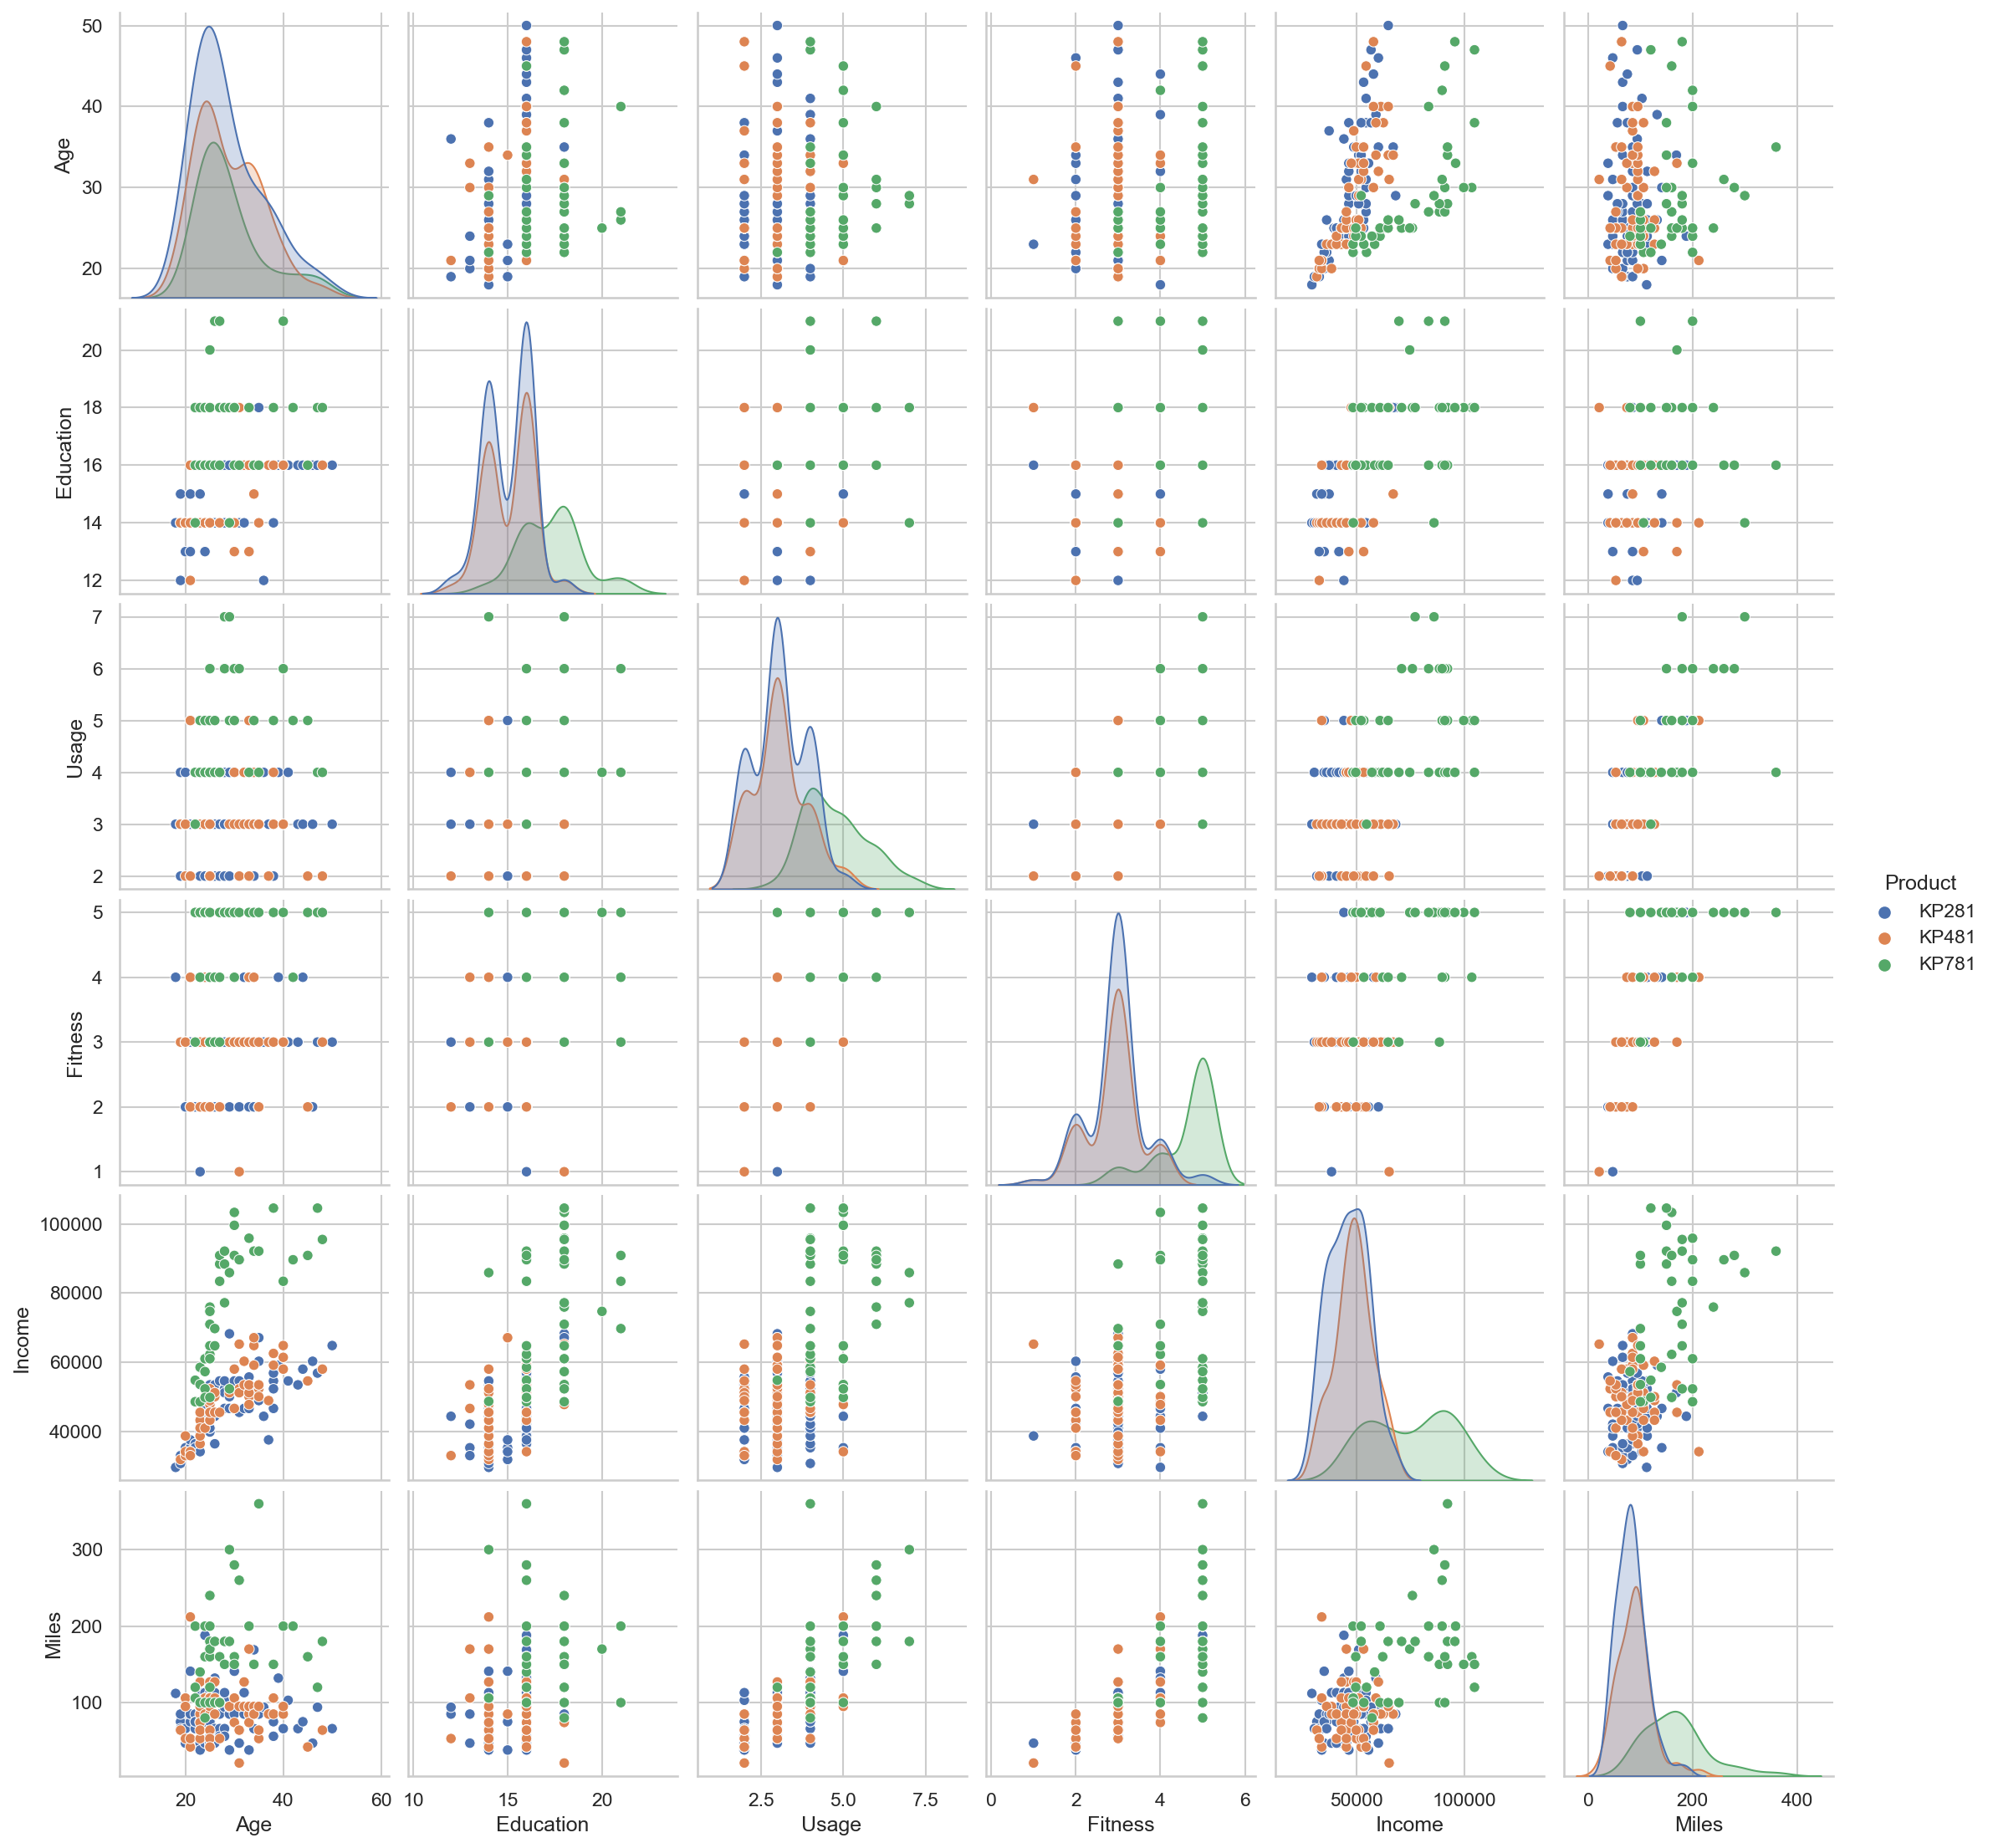

In [21]:
sns.pairplot(data, hue= 'Product')

<AxesSubplot: >

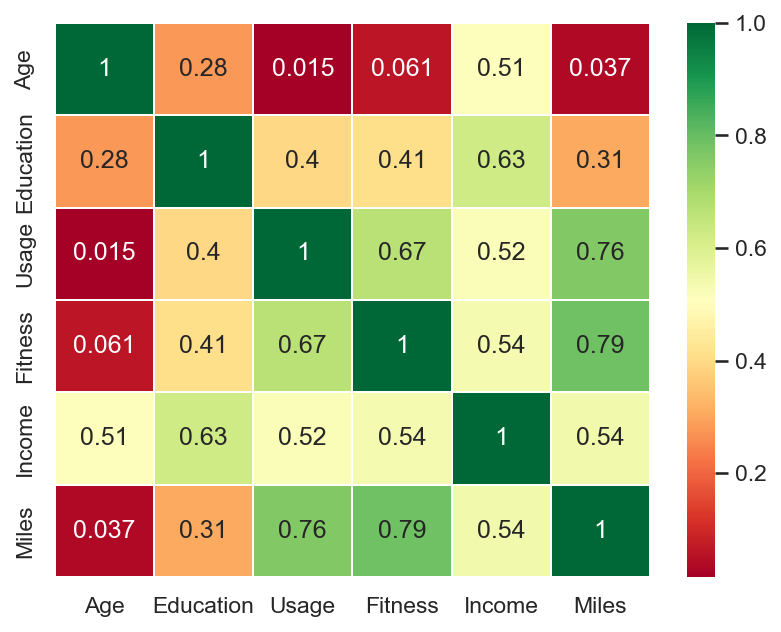

In [22]:
# Checking correlation between multiple numerical features

num_df = data.select_dtypes(exclude=['object', 'category'])
sns.heatmap(num_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix


In [23]:
# Correlation >= 0.5
print('Columns have high correlation')
display(
    data
    .select_dtypes(exclude=['object', 'category'])
    .corr()
    .pipe(lambda df: df[df>=0.5]) # get values greater than or equal to 0.5
    .fillna(0).replace(1,0)
    .stack()
    .pipe(lambda df: df[df>0]) # values greater than 0
    .map(lambda x: round(x,3)*100)
    .sort_values()
    .drop_duplicates()
    .reset_index()
    
)


Columns have high correlation


,level_0,level_1,0
0,Age,Income,51.3
1,Usage,Income,52.0
2,Fitness,Income,53.5
3,Income,Miles,54.3
4,Education,Income,62.6
5,Usage,Fitness,66.9
6,Usage,Miles,75.9
7,Fitness,Miles,78.6


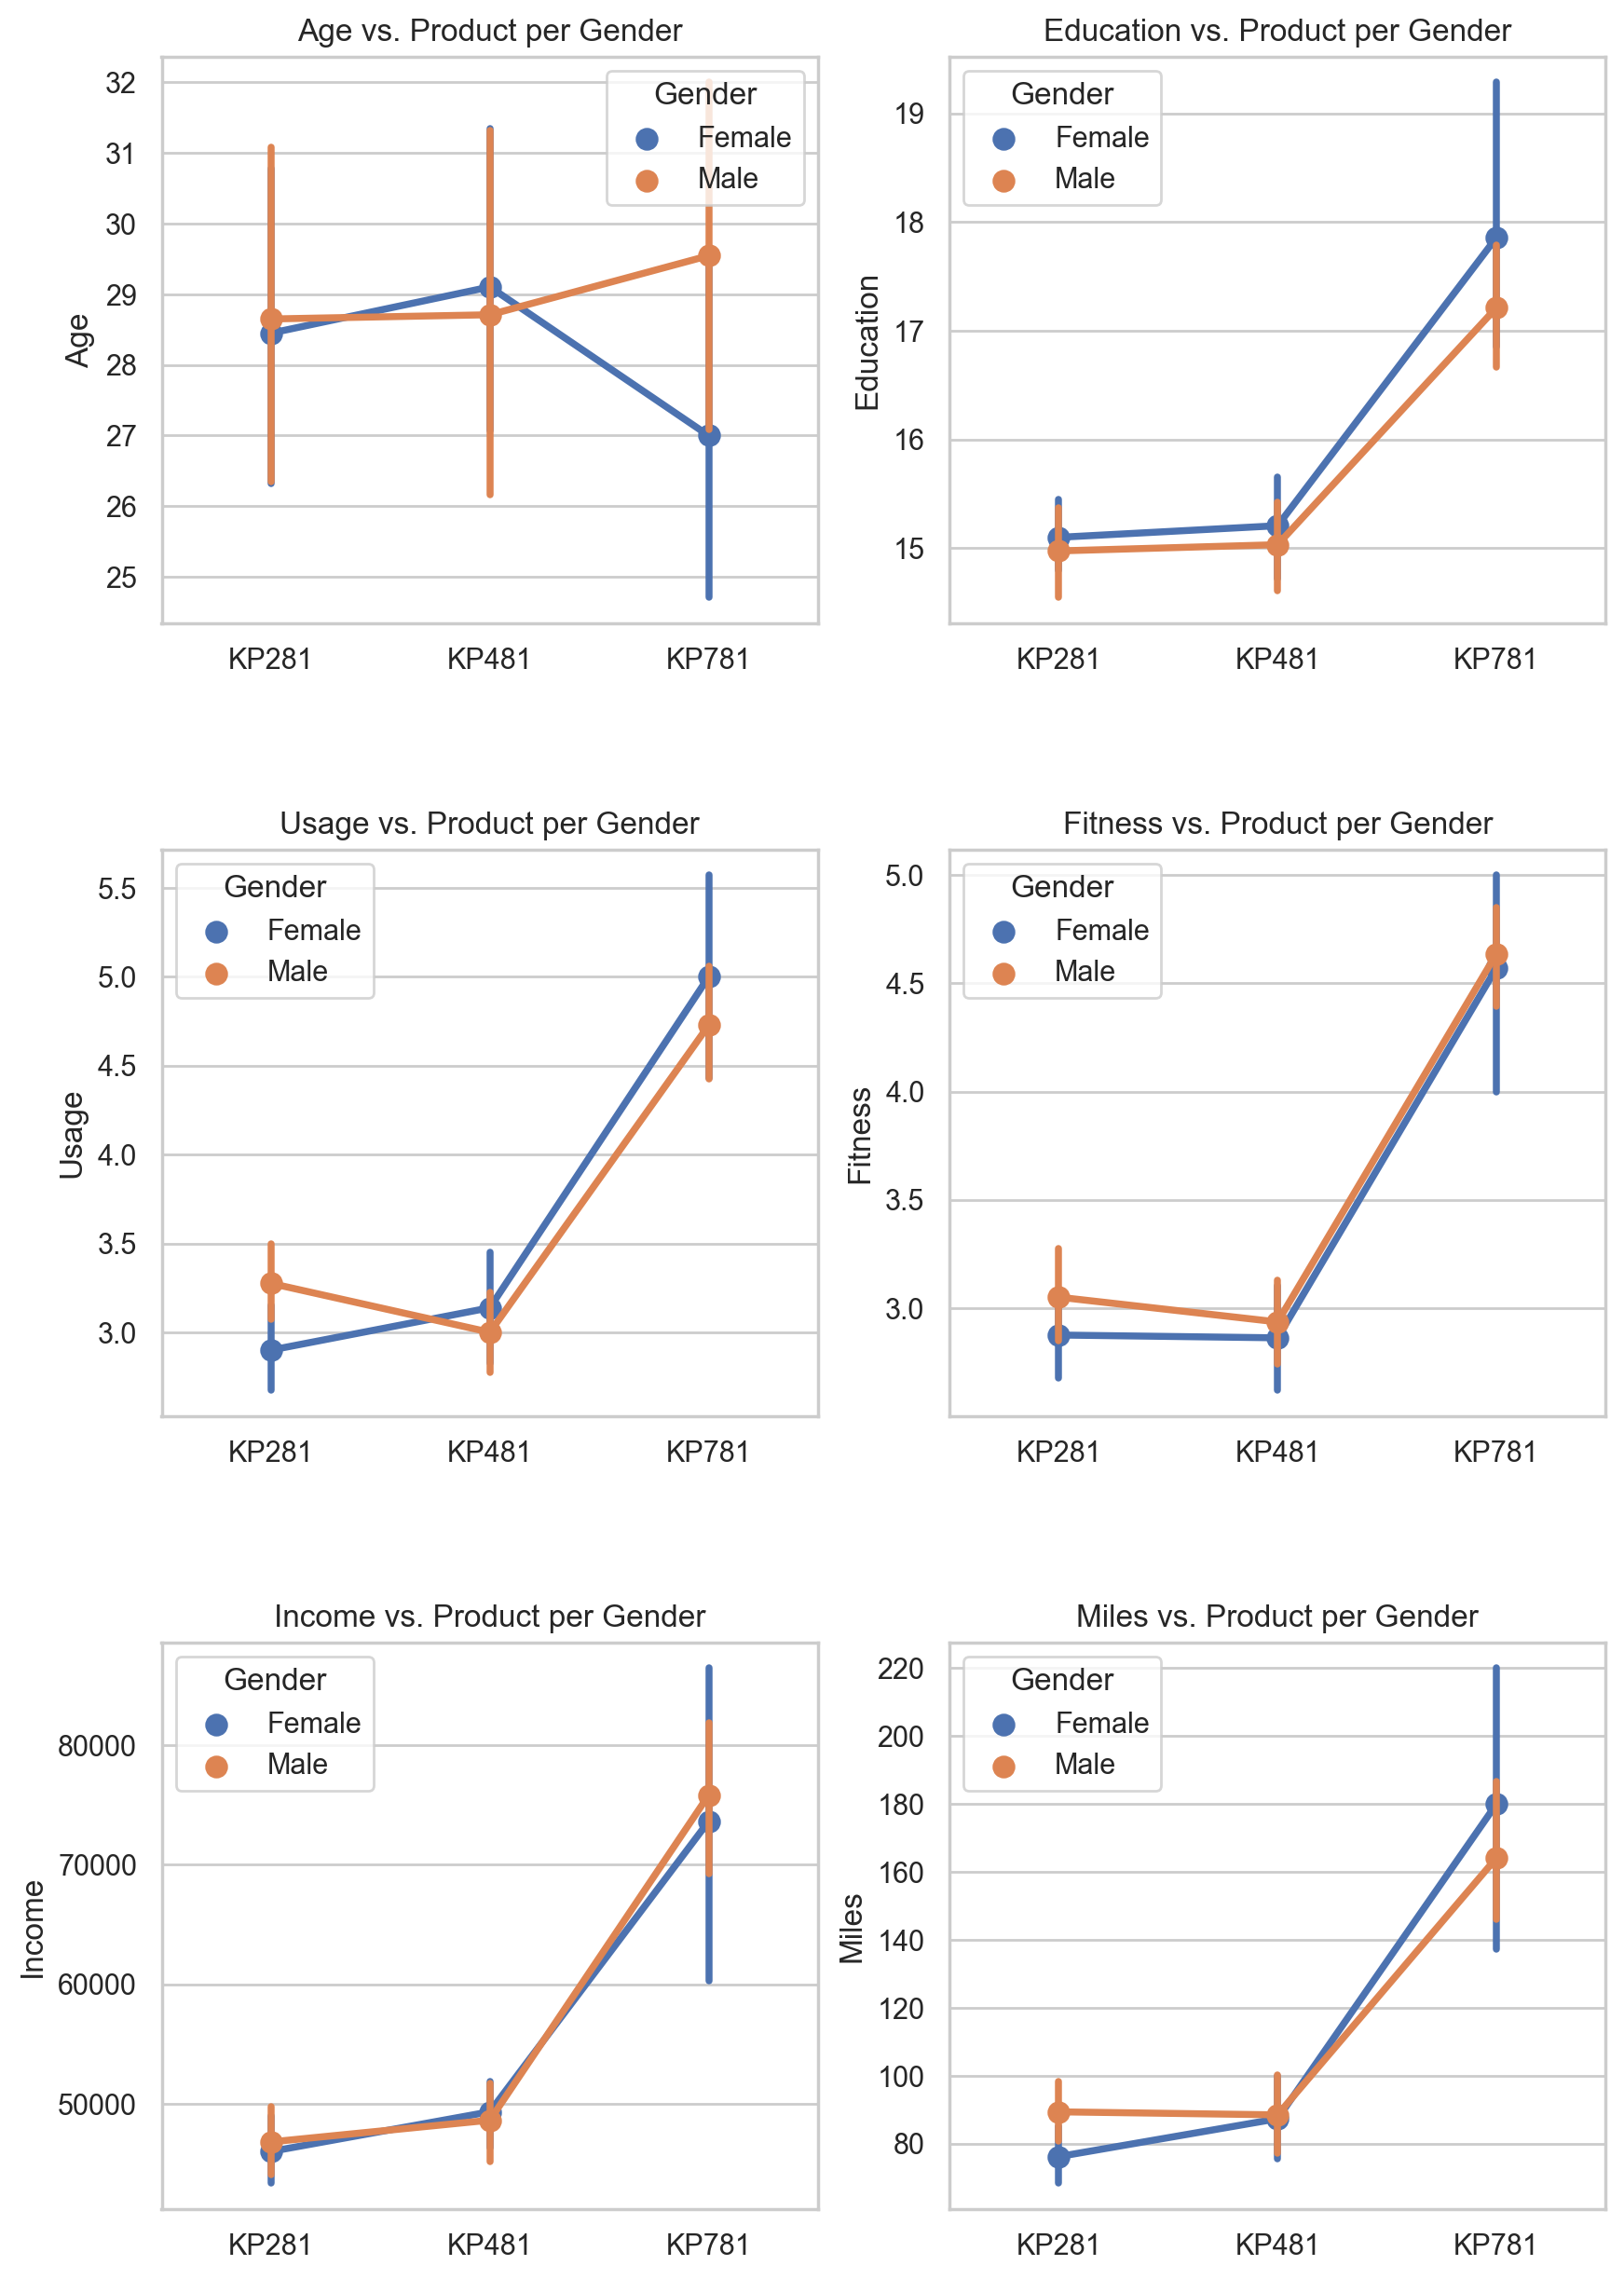

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), dpi=200)
plt.subplots_adjust(hspace=0.4)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.pointplot(data=data, x='Product', y=i, hue='Gender', ax=ax)
    ax.set_title(i+' vs. Product per Gender')
    ax.set_xlabel('')

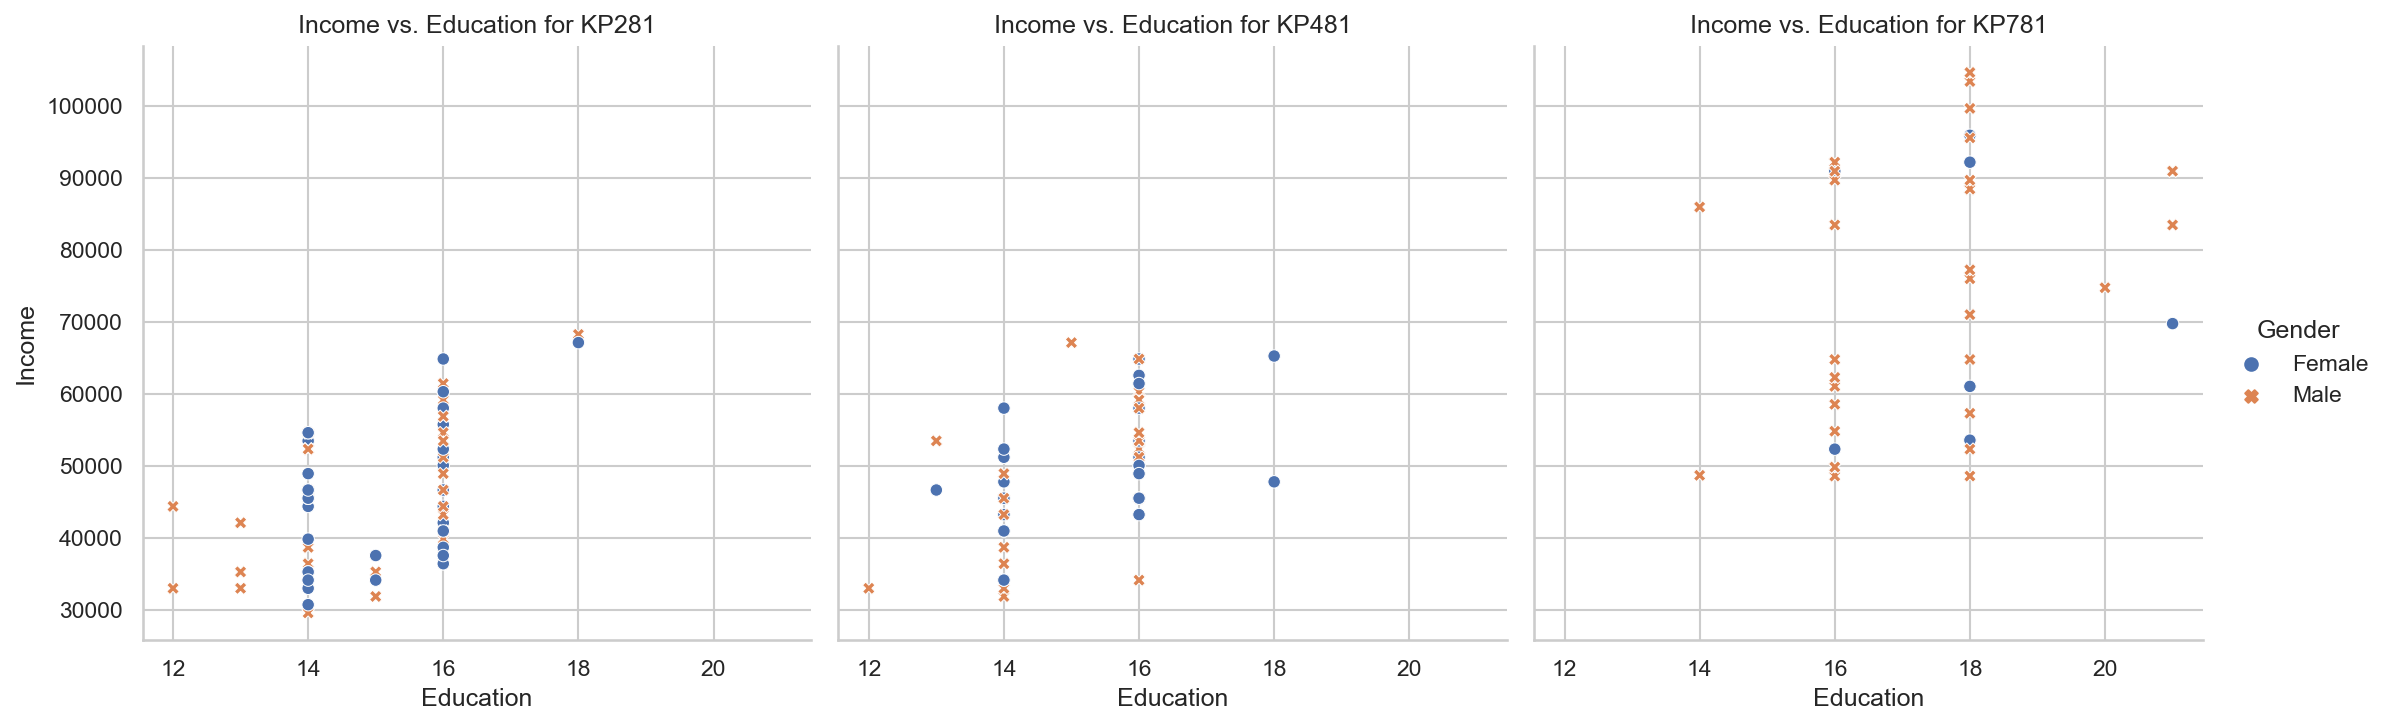

In [25]:
g = sns.relplot(data=data, x='Education',y='Income', col='Product', hue='Gender', style='Gender')
g.set_titles('Income vs. Education for {col_name}')
plt.show()

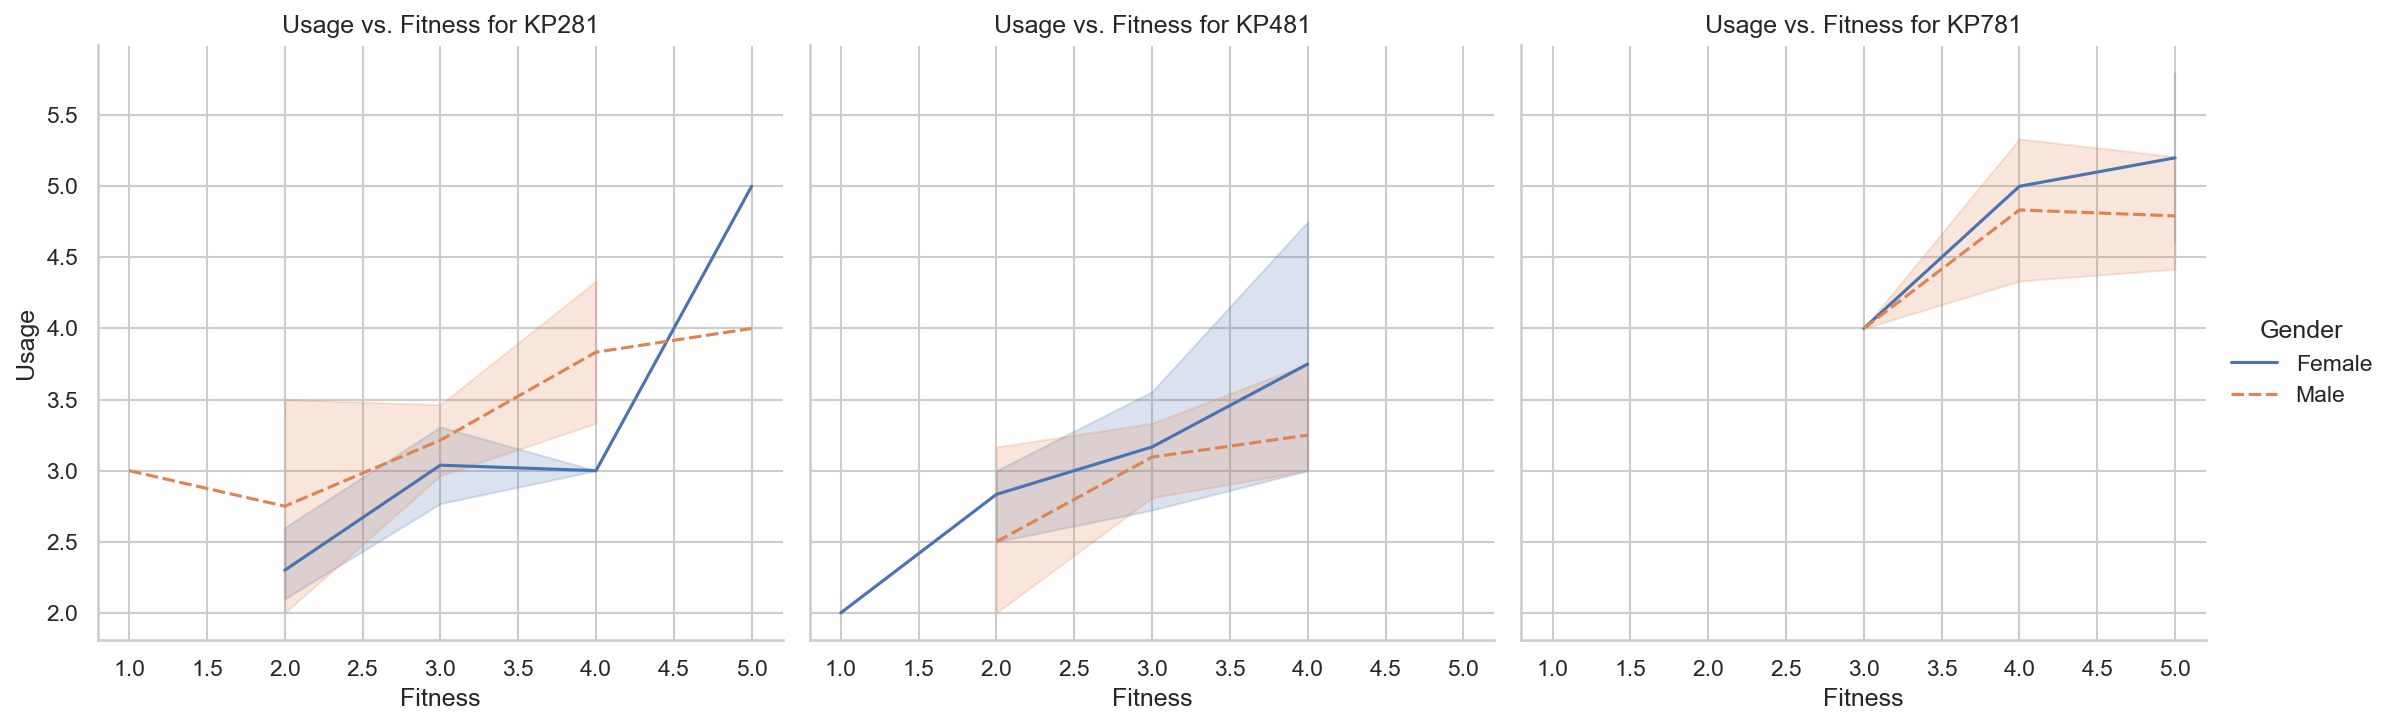

In [26]:
g = sns.relplot(data=data, x='Fitness', y="Usage", col="Product", hue='Gender', style='Gender', kind='line')
g.set_titles('Usage vs. Fitness for {col_name}')
plt.show()

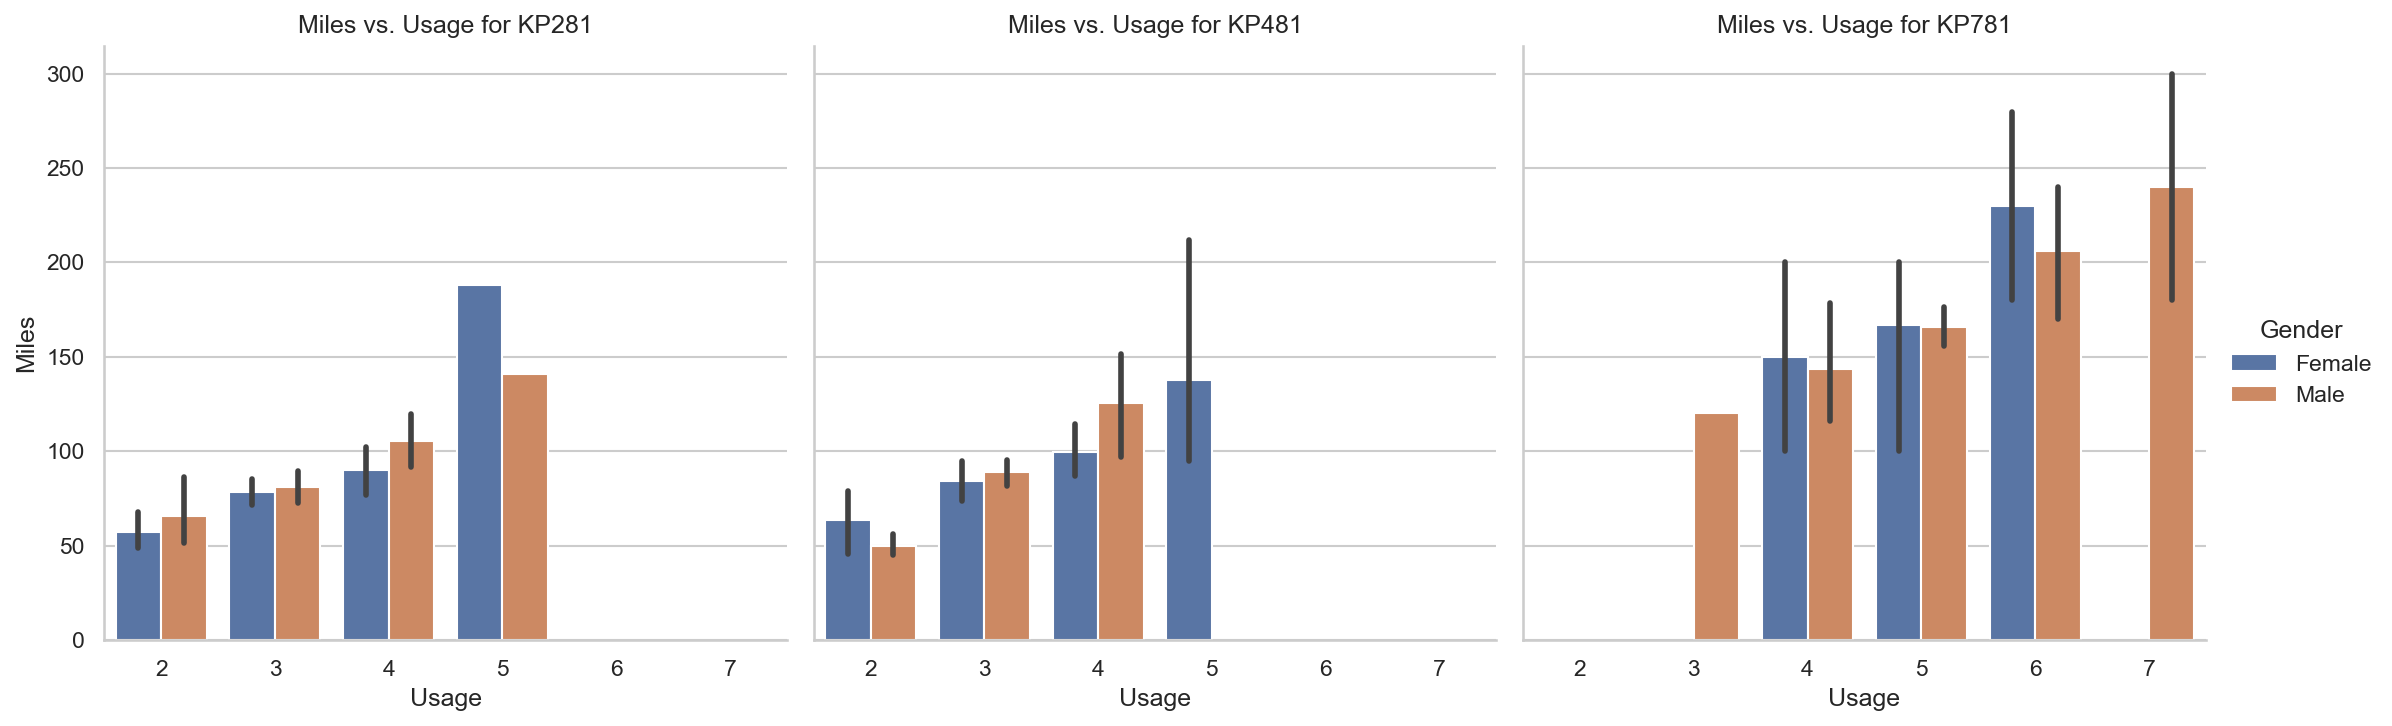

In [27]:
g = sns.catplot(data=data, x='Usage', y="Miles", col="Product", hue='Gender', kind="bar")
g.set_titles('Miles vs. Usage for {col_name}')
plt.show()

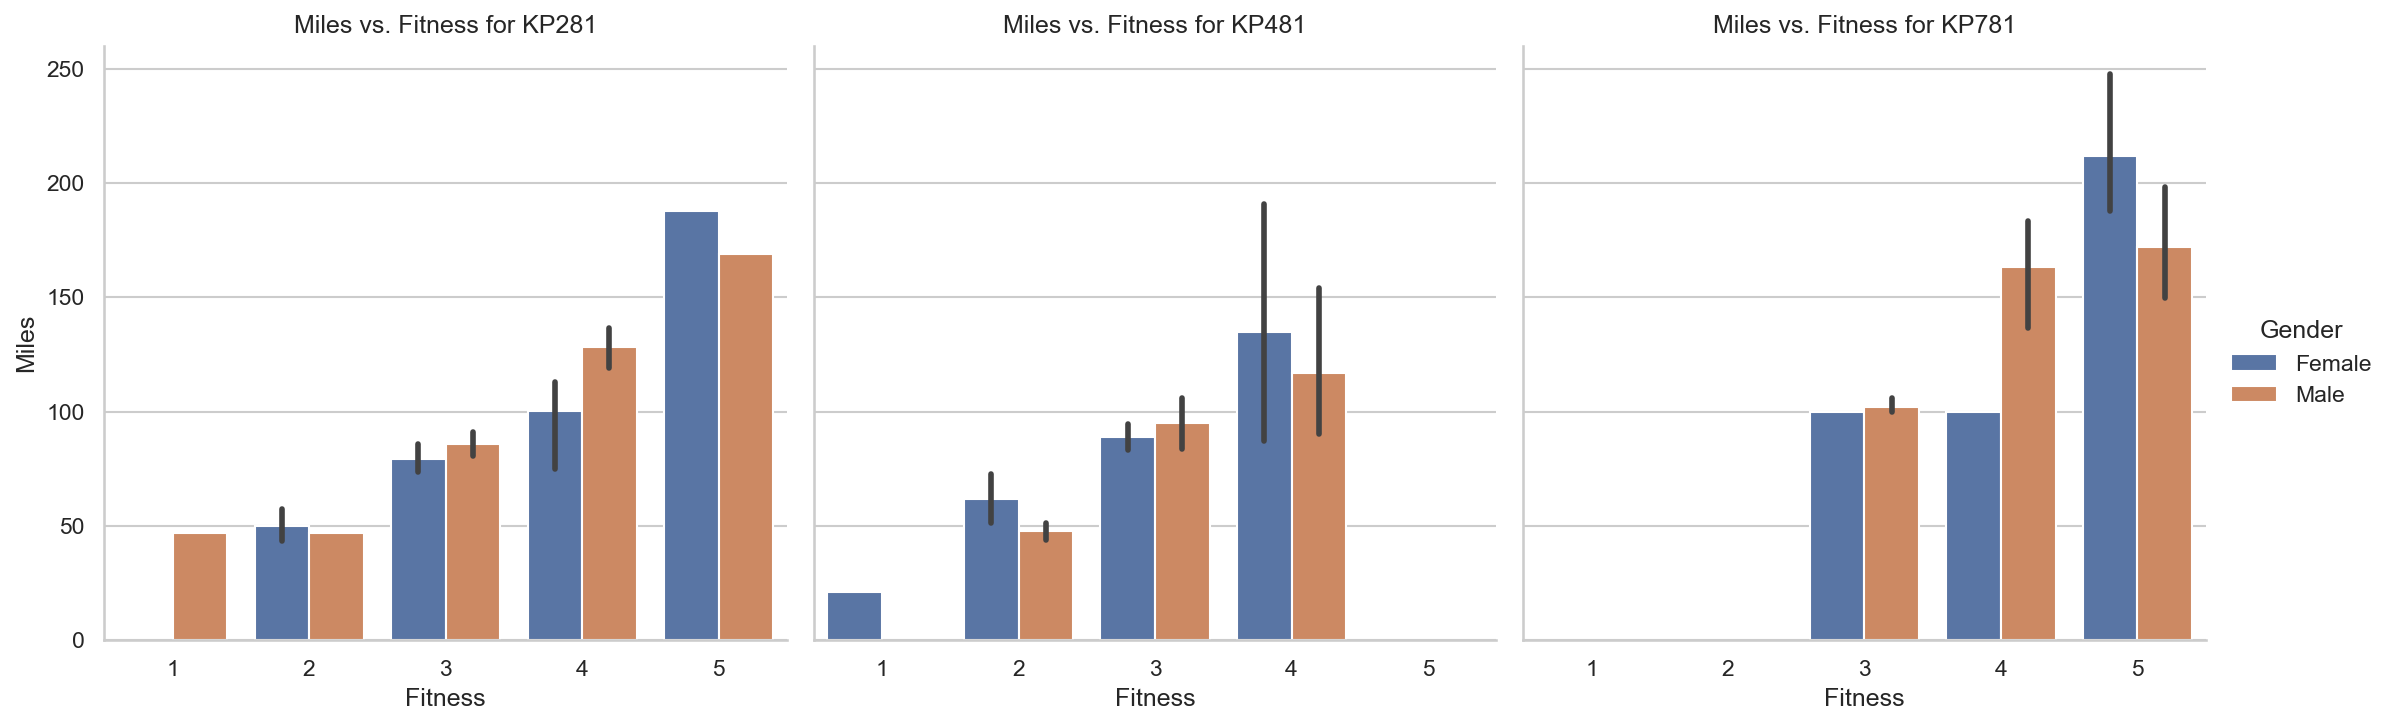

In [28]:
g = sns.catplot(data=data, x='Fitness', y="Miles", col="Product", hue='Gender', kind="bar")
g.set_titles('Miles vs. Fitness for {col_name}')
plt.show()

<div class="alert alert-block alert-info">
<h3>Observations:</h3> <br>
    1. High correlation between pairs Education-Income, Usage-Fitness, Usage-Miles and Fitness-Miles.<br>
    2. No significant difference in features for products KP281 and KP481.<br>
    3. Can see all columns except Age have higher values for product KP781.<br>
    4. Income greater than 70000\$ and Education greater than 16 years have buyed only KP781.<br>
    5. Fitness greater than 3 and Usage greater than 4 most likely to buy KP781.<br>
    6. Usage greater than 5 buyed only KP781.<br>
    7. Fitness equal to 5 has buyed only KP281 and KP781.<br>
</div>

<div color='white'>
    <br>
    <hr>
    <br>
</div>
    

## 6. Probability Analysis

### 6.1. Marginal Probability

In [29]:

for i in ['Fitness', 'Usage', 'Education']:
    display(
        (
            pd.crosstab(index=data[i], columns=data.Product, dropna=True, normalize=True, margins=True)
            .applymap(lambda x: (round(x*100,2)))
            .style.background_gradient(cmap='YlGnBu')
        )
    )
    print()

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.560000,0.560000,0.000000,1.110000
2,7.780000,6.670000,0.000000,14.440000
3,30.000000,21.670000,2.220000,53.890000
4,5.000000,4.440000,3.890000,13.330000
5,1.110000,0.000000,16.110000,17.220000
All,44.440000,33.330000,22.220000,100.000000


Product,KP281,KP481,KP781,All
Usage,,,,
2,10.560000,7.780000,0.000000,18.330000
3,20.560000,17.220000,0.560000,38.330000
4,12.220000,6.670000,10.000000,28.890000
5,1.110000,1.670000,6.670000,9.440000
6,0.000000,0.000000,3.890000,3.890000
7,0.000000,0.000000,1.110000,1.110000
All,44.440000,33.330000,22.220000,100.000000


Product,KP281,KP481,KP781,All
Education,,,,
12,1.110000,0.560000,0.000000,1.670000
13,1.670000,1.110000,0.000000,2.780000
14,16.670000,12.780000,1.110000,30.560000
15,2.220000,0.560000,0.000000,2.780000
16,21.670000,17.220000,8.330000,47.220000
18,1.110000,1.110000,10.560000,12.780000
20,0.000000,0.000000,0.560000,0.560000
21,0.000000,0.000000,1.670000,1.670000
All,44.440000,33.330000,22.220000,100.000000


In [30]:
(
    pd.crosstab(index=pd.cut(data.Income, bins=range(25000, 115000, 10000)), 
                columns=data.Product, dropna=True, normalize=True, margins=True)
    .applymap(lambda x: (round(x*100,2)))
    .style.background_gradient(cmap='YlGnBu')
)

Product,KP281,KP481,KP781,All
Income,,,,
"(25000, 35000]",4.440000,3.330000,0.000000,7.780000
"(35000, 45000]",14.440000,5.000000,0.000000,19.440000
"(45000, 55000]",19.440000,18.330000,5.000000,42.780000
"(55000, 65000]",5.000000,5.560000,3.890000,14.440000
"(65000, 75000]",1.110000,1.110000,1.670000,3.890000
"(75000, 85000]",0.000000,0.000000,2.220000,2.220000
"(85000, 95000]",0.000000,0.000000,6.110000,6.110000
"(95000, 105000]",0.000000,0.000000,3.330000,3.330000
All,44.440000,33.330000,22.220000,100.000000


In [31]:
(
    pd.crosstab(index=pd.cut(data.Miles, bins=range(0,450,50)), 
                columns=data.Product, normalize=True, margins=True)
    .applymap(lambda x: (round(x*100,2)))
    .style.background_gradient(cmap='YlGnBu')
)

Product,KP281,KP481,KP781,All
Miles,,,,
"(0, 50]",6.670000,2.780000,0.000000,9.440000
"(50, 100]",27.780000,21.670000,4.440000,53.890000
"(100, 150]",8.890000,7.220000,5.000000,21.110000
"(150, 200]",1.110000,1.110000,10.000000,12.220000
"(200, 250]",0.000000,0.560000,0.560000,1.110000
"(250, 300]",0.000000,0.000000,1.670000,1.670000
"(350, 400]",0.000000,0.000000,0.560000,0.560000
All,44.440000,33.330000,22.220000,100.000000


<div class="alert alert-block alert-info">
<h3>Observations:</h3> <br>
    1. Around 50% buyers have Fitness value 3.<br>
    2. Fitness value 3 mostly buys KP281 or KP481.<br>
    3. Fitness value 5 most likely to buy KP781.<br>
    4. Usage less than 5 are the most buyers.<br>
    5. Usage greater than 4 have good probability of buying KP781.<br>
    6. Most buyers have Education of 14 and 16 years.<br>
    7. Education greater than 16 years have more probability of buying KP781.<br>
    8. Income range 35000\$ - 45000\$ have higher probability of buying KP281.<br>
    9. Most buyers have Income between 35000\$ - 65000\$.<br>
    10. Miles less than 150 have less probability of buying KP781.<br>
    11. More than 50% buyers have miles less than 150 and buyed mostly KP281 or KP481.<br>
    12. High probability of buying KP281 than KP481 or KP781.<br>
</div>


### 6.2. Conditional Probability

In [32]:
for i in ['Fitness', 'Usage', 'Education']:
    display(
        (
            pd.crosstab(index=data[i], 
                        columns=data.Product, dropna=True, normalize='index', margins=True)
            .applymap(lambda x: (round(x*100,2)))
            .style.background_gradient(cmap='YlGnBu')
        )
    )

Product,KP281,KP481,KP781
Fitness,,,
1,50.000000,50.000000,0.000000
2,53.850000,46.150000,0.000000
3,55.670000,40.210000,4.120000
4,37.500000,33.330000,29.170000
5,6.450000,0.000000,93.550000
All,44.440000,33.330000,22.220000


Product,KP281,KP481,KP781
Usage,,,
2,57.580000,42.420000,0.000000
3,53.620000,44.930000,1.450000
4,42.310000,23.080000,34.620000
5,11.760000,17.650000,70.590000
6,0.000000,0.000000,100.000000
7,0.000000,0.000000,100.000000
All,44.440000,33.330000,22.220000


Product,KP281,KP481,KP781
Education,,,
12,66.670000,33.330000,0.000000
13,60.000000,40.000000,0.000000
14,54.550000,41.820000,3.640000
15,80.000000,20.000000,0.000000
16,45.880000,36.470000,17.650000
18,8.700000,8.700000,82.610000
20,0.000000,0.000000,100.000000
21,0.000000,0.000000,100.000000
All,44.440000,33.330000,22.220000


In [33]:
(
    pd.crosstab(index=pd.cut(data.Income, bins=range(25000, 115000, 10000)), 
                columns=data.Product, dropna=True, normalize='index', margins=True)
    .applymap(lambda x: (round(x*100,2)))
    .style.background_gradient(cmap='YlGnBu')
)

Product,KP281,KP481,KP781
Income,,,
"(25000, 35000]",57.140000,42.860000,0.000000
"(35000, 45000]",74.290000,25.710000,0.000000
"(45000, 55000]",45.450000,42.860000,11.690000
"(55000, 65000]",34.620000,38.460000,26.920000
"(65000, 75000]",28.570000,28.570000,42.860000
"(75000, 85000]",0.000000,0.000000,100.000000
"(85000, 95000]",0.000000,0.000000,100.000000
"(95000, 105000]",0.000000,0.000000,100.000000
All,44.440000,33.330000,22.220000


In [34]:
(
    pd.crosstab(index=pd.cut(data.Miles, bins=range(0,450,50)), 
                columns=data.Product, normalize='index', margins=True)
    .applymap(lambda x: (round(x*100,2)))
    .style.background_gradient(cmap='YlGnBu')
)

Product,KP281,KP481,KP781
Miles,,,
"(0, 50]",70.590000,29.410000,0.000000
"(50, 100]",51.550000,40.210000,8.250000
"(100, 150]",42.110000,34.210000,23.680000
"(150, 200]",9.090000,9.090000,81.820000
"(200, 250]",0.000000,50.000000,50.000000
"(250, 300]",0.000000,0.000000,100.000000
"(350, 400]",0.000000,0.000000,100.000000
All,44.440000,33.330000,22.220000


<div class="alert alert-block alert-info">
<h3>Observations:</h3> <br>
    1. Very high probability of buying KP781 given that Fitness value is 5.<br>
    2. For KP781 high probability of buying if Usage is greater than 4.<br>
    3. Education years less than 16 have high probability of buying KP281 and KP481. <br>
    4. Education greater than 16 are most likely to buy KP781.<br>
    5. Income range between 55000\$ - 65000\$ have slightly high probability of buying KP481.<br>
    6. Customers having income between 35000\$ - 45000\$ very high probability of buying KP281.<br>
    7. Customers having income greater than 65000\$ are most likely to buy KP781.<br>
    8. Miles value less than or equal to 50 are most likely to buy KP281.<br>
    9. High probability of buying KP781 when Miles are greater than 150.<br>
    

</div>

### 6.3. Grouped Marginal Probability

In [35]:
(
    pd.crosstab(index=[data.Fitness, pd.cut(data.Usage, bins=range(1,8,2))], 
            columns=data.Product, normalize=True, margins=True)
    .applymap(lambda x: round(x*100,2))
    .style.background_gradient(cmap='YlGnBu')
)
    

In [36]:
(
    pd.crosstab(index=[data.Fitness, pd.cut(data.Usage, bins=range(1,8,2)), pd.cut(data.Miles, bins=range(0,450,50))], 
            columns=data.Product, normalize=True, margins=True)
    .applymap(lambda x: round(x*100,2))
    .style.background_gradient(cmap='YlGnBu')
)

In [37]:
(
    pd.crosstab(index=
                [data.Education, 
                 pd.cut(data.Income, bins=range(25000, 115000, 10000))
                ], 
            columns=data.Product, normalize=True, margins=True)
    .applymap(lambda x: round(x*100,2))
    .style.background_gradient(cmap='YlGnBu')
)

<div class="alert alert-block alert-info">
<h3>Observations:</h3> <br>
    1. Most buyers have Fitness value 3 and Usage between 1-5.<br>
    2. Fitness value 4 and Usage 5-7 are most likely to buy KP781.<br>
    3. Customers having Fitness 3 and Usage 1-3 and Miles less than 100 have highest probability and they buyed KP281 and KP481 only.<br>
    4. More than 50% buyers have Education 14 or 16 and Income range 45000\$-65000\$.<br>
    5. Education 16 and Income between 45000\$-55000\$ most likely to buy KP481.<br>
    6. High probability of buying KP281 when Education is 14 years and Income between 45000\$-65000\$.<br>
</div>

<div>
    <br>
    <hr>
    <br>
</div>

<div class="alert alert-block alert-info">
<h2 style="text-align: center;">Customer Profile for Products:</h2> 
    <br>
<h3><b>KP281:<b></h3>
<ol>
    <li>This is the Most buyed Product.</li>
    <li>Partnered female are most likely to buy this.</li>
    <li>Recommend KP281 if one or more conditions are satisfied :-</li>
    <ul>
        <li>Income <= \$50000</li>
        <li>Education < 16 years </li>
        <li>Usage days <= 4 </li>
        <li>Fitness Levels <= 4 </li>
        <li>Miles <= 100</li>
    </ul>
    <li>This product is mainly for people whose usage is low and have less income.</li>
</ol>
   <br>
<h3><b>KP481:<b></h3>
<ol>
    <li>There are not much difference in buying pattern of KP281 and KP481.</li>
    <li>But we can easily convert person from buying KP281 to this where below conditions are satisfied :-</li>
    <ul>
        <li>Income in range \$50000 - \$65000</li>
        <li>Education < 16 years </li>
        <li>Usage days in range 3-4 </li>
        <li>Fitness Levels <= 4 </li>
        <li>Miles in range 100-150</li>
    </ul>
    <li>Partnered Male are most likely to buy this than single male.</li>
    <li>This is mostly recommended for people who have more usage or good Fitness level or medium income.</li>
</ol>
    <br> 
<h3><b>KP781:</b></h3>

<ol>
    <li>As we have seen KP781 is the least bought product as it is luxurious so we can recommend it to people who have high income or to professional athlete.
    </li>
    <li> Most of the buyers are male.
    <li>Very few women have bought the luxurious KP781 treadmill. Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781(affordability).
    </li>
    <li>Recommend KP781 if one or more conditions are satisfied :-</li>
    <ul>
        <li>Income >= $ 65000</li>
        <li>Education > 16 years </li>
        <li>Usage days >= 4 </li>
        <li>Fitness Levels = 5 </li>
        <li>Miles >= 150</li>
    </ul>
    <li>Partnered Male people more likely to buy more with above conditions.</li>
    
</ol>
<br>

</div>

<div></div>